#**INDIVIDUAL ID** **:** PTID-CDS-APR-24-1892

#**BATCH ID** **:** 20-NOV-CDS-WDM09-BAN

#**PROJECT** **:** PRCP-1004-Fifa20

##**Business Case :**

###Explore football skills and cluster football players based on their attributes so that we easly understand who is the best player and  with the fifa20 dataset we need to cluster the player by theri skill into certain group.

##**TASK**
- ### Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

- ### Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

- ### Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

###**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

###**LOADING THE DATA**

In [ ]:
data=pd.read_csv("/content/players_20.csv")
data

In [ ]:
pd.set_option("display.max_columns",None)
data

####THERE ARE SO MANY UNWANTED COLUMN , SO LETS REMOVE IT

In [ ]:
data.drop(['sofifa_id','player_url','long_name','dob','real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number','player_traits'], inplace=True, axis=1)
data

##**DOMAIN ANALYSIS**

####INTRODUCTION OF PROJECT:FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch

#### 1.SOFIFA-ID
- Id of fifa20 player
#### 2.PLAYER URL
- A URL (Uniform Resource Locator) is a unique identifier used to locate a resource on the Internet. It is also referred to as a web address.
#### 3.SHORT NAME
- Short or nick name name of player
#### 4.LONG NAME
- Full name of player
#### 5.AGE
- Age in years
#### 6.DOB:
- Date of birth of player
#### 7.HEIGHT CM:
- Player height in centimeter
#### 8.WEIGHT KG:
- Player body weight
#### 9.NATIONALITY:
- Nationality is the legal status, which represents the country from which an individual belongs.
#### 10.CLUB:
- A group of people formed for the purpose of playing sports.
#### 11.OVERALL:
- The OVR (Overall) is made up of all the players ingame stats.
#### 12.POTENTIAL:
- The potential rating, is the rating they will achieve for sure during the FIFA 20 career mode.
#### 13.VALUE EUR:
- The value of palyer in euro.
#### 14.WAGE EUR:
- A living wage is the amount of income needed to provide an player with a basic but socially acceptable standard of living.
#### 15.PLAYER POSITIONS:
- Positions indicate approximately where each player should be lined up prior to the start of a play.
#### 16.PREFEERED FOOT:
- Footedness may refer to the foot a player uses to kick with the greatest force and skill.
#### 17.INTERNATIONAL REPUTATION:
- International reputation is rated with 1-5 stars.
#### 18.WEAK FOOT:
- A players foot (left or right) that is weaker than their preferred foot. A players attribute rated between 1 to 5 which   specifies the shot power and ball control for the other foot of that player than his preferred foots.
#### 19.SKILL MOVES:
- Skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.
#### 20.WORK RATE:
- Work rates are how hard the player works on each end of the field.
#### 21.BODY-TYPE:
- A custom body type and character of football payer.
#### 22.REAL FACE:
- Face scan of real football palyer if it 'yes' then the character is look super realistic.
#### 23.RELEASE CLAUSE EUR:
- A release clause is the minimum amount of money youre willing to accept for that player.
#### 24.PLAYER TAGS:
- The tages of player is identified the palyer skills,like [Dribbler, Distance shooter, Crosser, Speedster]
#### 25.TEAM POSITION:
- The player’s positioning on the field
#### 26.TEAM JERSEY NUMBER:
- The number on the back of a football player's jersey is to identify a specific player.
#### 27.LONED FROM:
- It's a temporary restriction placed on player due to their club being short of players.
#### 28.JOINED:
- Joining date of club
#### 29.CONTRACT VALID UNTIL:
- The end year of contract of players.
#### 30.NATION POSITION:
- Nation position is similar to the team position of players.
#### 31.NATION JERSEY NUMBER:
- Jersey number of player.
#### 32.PACE:
- Fastest pace of player,striker or winger
#### 33.SHOOTING:
- Shooting is hitting the ball in an attempt to score a goal. It is usually done using the feet or head.
#### 34.PASSING:
- The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field.
#### 35.DRIBLING:
- Dribbling Is Maneuvering A Ball By One Player While Moving In A Given Direction, Avoiding Problems’ Attempts To Intercept The Ball.
#### 36.DEFENDING:
- Defending is most relate to the defender to stop the attack
#### 37.PHYSIC:
- physic in player means intensity and their effort.
#### 38.GK DIVING:
- Goal keeper diving to save a shot.
#### 39.GK HANDLING:
- As a goalkeeper, you are allowed to handle the ball with your hands within your penalty area.
#### 40.GK KICKING:
- The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked extremely hard to travel a long distance.
#### 41.GK REFLEX:
- Ability to react quickly.
#### 42.GK SPEED:
- Spped of goal keeper.
#### 43.GK POSITIONING:
- Position of goal keeper is around only goal posts.
#### 44.PLAYER TRAITS:
- A player’s traits are actions that he will be more likely to perform in matches.
#### 45.ATTACKING CROSSING:
- The aim of a cross is to create the easiest possible scenario for the attacking player to score a goal.
#### 46.ATTACKING FINISHING:
- Create a attack on field to score a goal
#### 47.ATTACKING HEADING ACCURACY:
- One of the fundamental principles of the attacking header is to head the ball downwards.
#### 48.ATTACKING SHORT PASSING:
- Short passes of ball to score a goal
#### 49.ATTACKING VOLLEYS:
- A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.
#### 50.SKILL DRIBBLING:
- The score of dribbling skill with football
#### 51.SKILL CURVE:
- The curve of football at the time of goal
#### 52.SKILL FK ACCURACY:
- It stands for field goal. It is when a player kicks a ball through the uprights from a set distance.
#### 53.SKILL LONG PASSING:
- The long passing skill score of the player
#### 54.SKILL BALL CONTROL:
- The ball control of the player at playing time
#### 55.MOVEMENT ACCERLATION:
- How quickly player can increase your velocity towards maximum speed.
#### 56.MOVEMENT SPRINT SPPED:
- Sprinting speed score of the player.
#### 57.MOVEMENT AGILITY:
- Agility is the ability to move quickly and easily, including moving in different directions without losing balance
#### 58.MOVEMENT REACTION:
- The score of the quick reation of player.
#### 59.MOVEMENT BALANCE:
- Balance is the ability to control your body in its own space.
#### 60.SHOT POWER:
- Power generate to score a goal.
#### 61.POWER JUMPING:
- The jumping ability of the player on field.
#### 62.POWER STAMINA:
- Stamina of player on filed.
#### 63.POWER STRENGTH:
- Strength of player on field.
#### 64.POWER LONG SHOT:
- Total no of power long shot of football.
#### 65.MENTAILITY AGGRESSION:
- Aggression is a characteristic that can have many negative as well as positive effects on performance of player.
#### 66.MENTALITY INTERCEPTION:
- Interception is thrown the possession of the ball is given to the other team.
#### 67.MENTALITY POSITIONING:
- The mentality positioning of player determines how defensive or attacking your players set out to play.
#### 68.MENTALITY VISION:
- The vision/mindset of player on filed.
#### 69.MENTALITIES PENALTIES:
- When a player commits an infraction against the rules of the game a foul will be called and a penalty will be assessed.
#### 70.MENTALITY COMPOSURE:
- Composure stand for: Recognize–Regroup–Refocus. The first step is to Recognize that you are dwelling on the mistake, which limits your ability focus on the next play.
#### 71.DEFENDING MAKING:
- When your team is defending, you want to make the field small and the options of the other team limited.
#### 72.DEFENDING STANDING TACKLE:
- Defending standing Tackle of the player to get a ball on filed.
#### 73.DEFENDING SLIDING TACKLE:
- Defending sliding tackle of player to get a ball.
#### 74.GOALKEEPING DIVING:
- Goal keeper diving to save a goal.
#### 75.GOALKEEPING HANDLING:
- Handle the ball with your hands within your penalty area.
#### 76.GOALKEEPING KICKING:
- A kick taken by the goalkeeper when the attacking team has kicked the ball over the goal line.
#### 77.GOALKEEPING POSITIONING:
- A Positioning of player to save the goal.
#### 78.GOALKEEPING REFLEX:
- The reflex of goalkeeper and players.

##THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:
#### 79.LS:
- Long snapper or left striker.
#### 80.ST:
- Striker
#### 81.RS:
- Right striker
#### 82.LW:
- Left sided wingers.
#### 83.LF:
- Left forword
#### 84.CF:
- Center forword
#### 85.RF:
- Right forword
#### 86.RW:
- The RW is usually on the right end of the attacking trident, with the Striker and Left Winger, which mainly contributes to the team in terms of goals and assists.
#### 87.LAM:
- Left attacking midfield
#### 88.CAM:
- Center attacking midfield
#### 89.RAM:
- Right attacking midfield
#### 90.LM:
- Left midfield
#### 91.LCM:
- Left center midfield
#### 92.CM:
- Center Midfield
#### 93.RCM:
- Right center midfield
#### 94.RM:
- Right midfield
#### 95.LWB:
- Left Wing Back
#### 96.LDM:
- Left defensive midfield
#### 97.CDM:
- Center defensive midfield
#### 98.RDM:
- Right defensive midfield
#### 99.RWB:
- Right wing back
#### 100.LB:
- Left back
#### 101.LCB:
- Left center back
#### 102.CB:
- Center back
#### 103.RCB:
- Right center back
#### 104.RB:
- Right back

##**BASIC CHECKS**

In [ ]:
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
data.tail()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,70000.0,RES,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,72000.0,SUB,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,70000.0,SUB,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,70000.0,SUB,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,Pan Ximing,26,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,NaN,SUB,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [ ]:
list(data.columns)

['short_name',
 'age',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'release_clause_eur',
 'team_position',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_

In [ ]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
release_clause_eur             1298
team_position                   240
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                  

In [ ]:
data.shape

(18278, 91)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

IN THIS DATA , WE GET [ FLOAT=13 , INT=44 , 0BJECT=34 ]

In [ ]:
list(data.dtypes)

[dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dt

In [ ]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000

In [ ]:
pd.set_option("display.max_columns",None)
data.describe(include='O')

,short_name,nationality,club,player_positions,preferred_foot,work_rate,body_type,team_position,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18038,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,17354,162,698,643,2,9,10,29,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,J. Rodríguez,England,FC Barcelona,CB,Right,Medium/Medium,Normal,SUB,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,11,1667,33,2322,13960,9875,10750,7820,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


In [ ]:
for i in data:
    print(i,data[i].value_counts())
    print('*'*80)

Streaming output truncated to the last 5000 lines.
94      1
93      1
Name: count, dtype: int64
********************************************************************************
skill_fk_accuracy skill_fk_accuracy
35    478
39    472
40    471
42    465
32    459
34    424
30    418
38    417
41    409
31    409
37    384
33    381
48    373
36    373
29    370
45    362
28    356
43    340
12    325
44    319
55    318
58    309
13    308
46    304
59    300
60    293
49    284
47    282
52    281
56    279
62    265
14    260
50    259
27    254
11    248
64    248
25    245
57    245
65    243
68    238
61    237
66    231
54    227
51    224
26    221
70    216
53    216
63    215
67    205
69    197
24    164
22    163
23    161
15    157
71    155
10    155
21    144
72    140
20    132
73    122
74    119
75    116
16    109
18    100
19     97
17     89
76     82
78     72
77     65
79     43
80     42
9      32
8      27
81     26
82     24
85     14
83     14
7      13
84    

In [ ]:
for i in data:
    print(i,data[i].unique())
    print('*'*80)

short_name ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'Xiao Mingjie'
 'Wang Haijian' 'Pan Ximing']
********************************************************************************
age [32 34 27 26 28 33 20 25 31 30 24 29 23 19 22 37 36 21 41 38 35 18 40 39
 17 16 42]
********************************************************************************
height_cm [170 187 175 188 181 193 172 178 191 192 168 173 184 182 189 176 177 199
 194 185 183 180 179 169 186 174 163 165 195 190 196 171 197 167 198 166
 164 200 161 158 201 203 162 157 160 159 156 202 205]
********************************************************************************
weight_kg [ 72  83  68  87  74  70  85  92  66  71  73  89  91  82  86  80  76  75
  84  69  96  67  77  78  64  81  61  94  59  60  90  79  97  65  95  93
  63  62  88 100  98  58 101 103  56  99  57 102  55  52  54 104 107  53
 110  50]
********************************************************************************
nationality ['Argentina' 'Portugal'

##**EDA**

###**UNIVARIATE ANALYSIS**

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.7 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
columns=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
data[columns]

for i in columns:
    data[i]=data[i].str.split('+',expand=True)[0].fillna(0).astype(np.int64)
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61


##**BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'age  vs  overall')

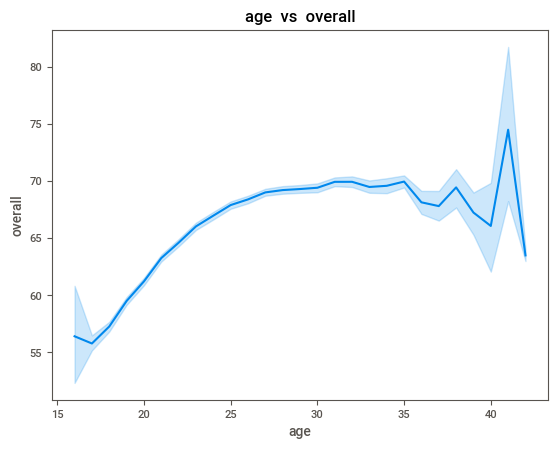

In [ ]:
# 1.relation between age and overall
sns.lineplot(x='age',y='overall',data=data)
plt.title('age  vs  overall')

### observation
- 25-30 aged players shows high overall

Text(0.5, 1.0, 'age  vs  pace')

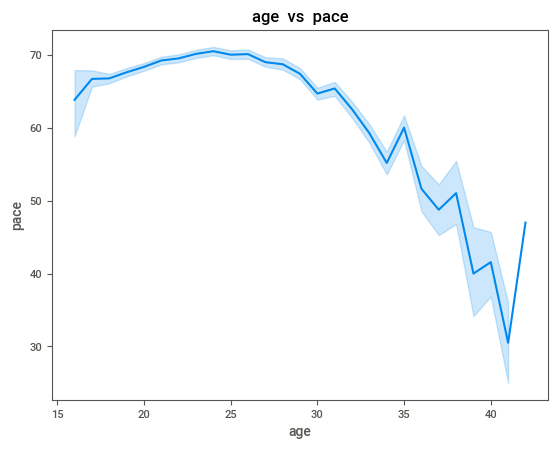

In [ ]:
# 2.realtion between age and pace
sns.lineplot(x='age',y='pace',data=data)
plt.title('age  vs  pace')

### Observation
- Age shows an inverse relationship with pace, indicating speed diminishes with advancing age

Text(0.5, 1.0, 'age  vs  movement sprint speed')

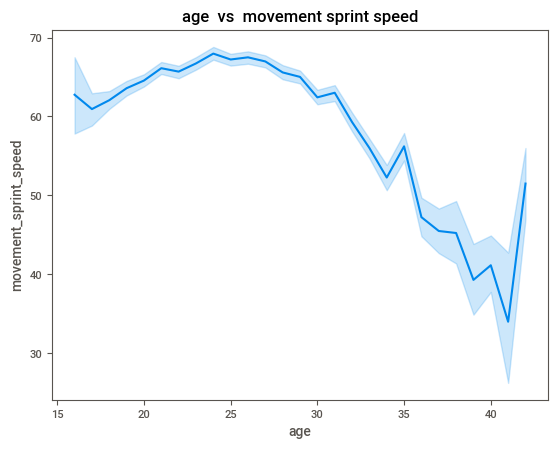

In [ ]:
# 3.relation betweeen age and movement sprint speed
sns.lineplot(x='age',y='movement_sprint_speed',data=data)
plt.title('age  vs  movement sprint speed')

### Observation
- Sprint speed decreases with increase in age, sprint speed is maximum when players age is 25

Text(0.5, 1.0, 'age  vs  movement balance')

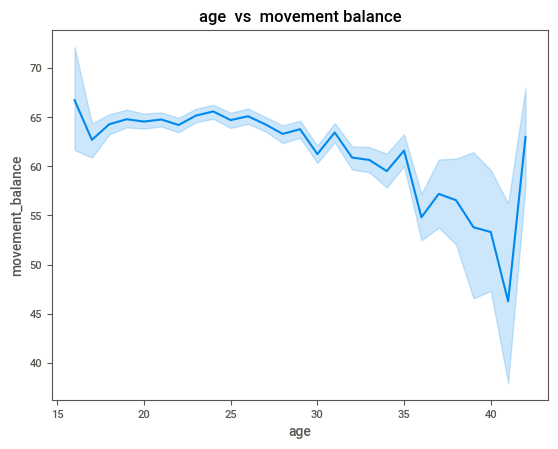

In [ ]:
# 4.relation between age and movement balance
sns.lineplot(x='age',y='movement_balance',data=data)
plt.title('age  vs  movement balance')

### Observation
- As the age increases the Movement balance decreases,when age=15 the Movement balance is at peak

Text(0.5, 1.0, 'age  vs  skill ball control')

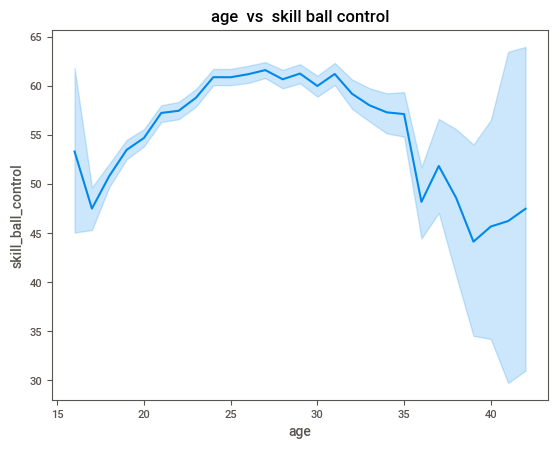

In [ ]:
# 5.relation between age and skill ball control
sns.lineplot(x='age',y='skill_ball_control',data=data)
plt.title('age  vs  skill ball control')

### Observation
- In the age 20-35 the ball control increases & after 35 ball control is decreases

Text(0.5, 1.0, 'age  vs  power stamina')

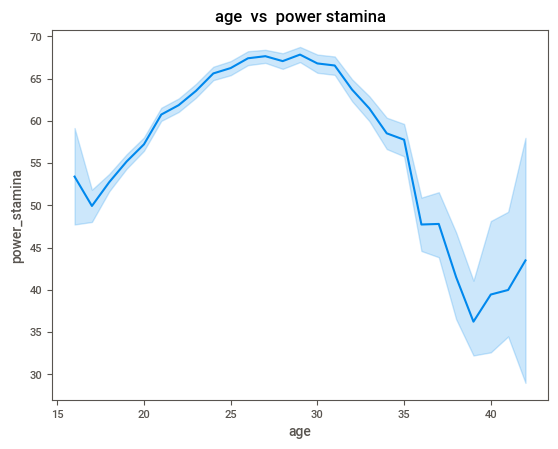

In [ ]:
# 6.relation between age and power stamina
sns.lineplot(x='age',y='power_stamina',data=data)
plt.title('age  vs  power stamina')

### Observation
- Players stamina increases with age and players having age between 25-30 showing high level of stamina, after 30s it decreases.

Text(0.5, 1.0, 'age  vs  weight')

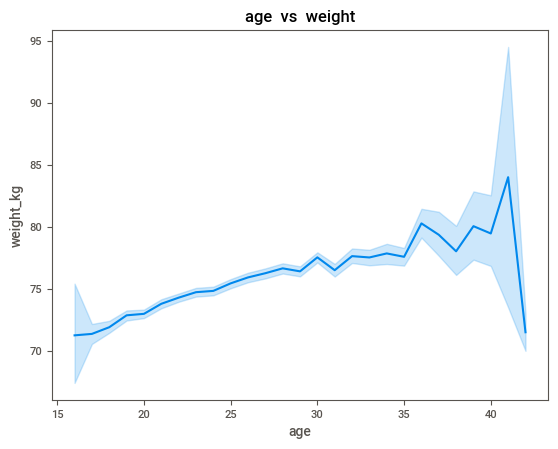

In [ ]:
# 6.relation between age and weight
sns.lineplot(x='age',y='weight_kg',data=data)
plt.title('age  vs  weight')

### Observation
- Weight of the player increases with age

Text(0.5, 1.0, 'international reputation  vs  wage')

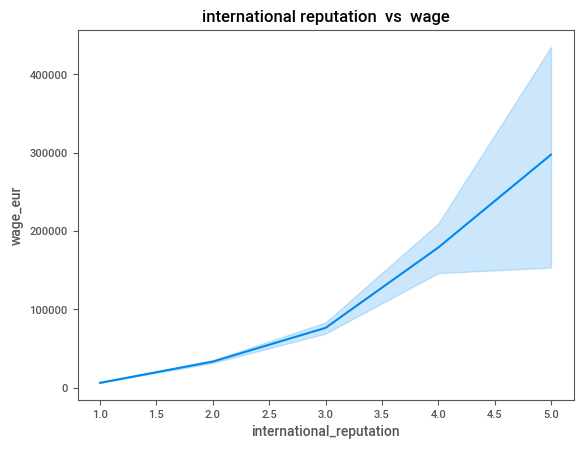

In [ ]:
# 7.relation between international reputation and wage
sns.lineplot(x='international_reputation',y='wage_eur',data=data)
plt.title('international reputation  vs  wage')

### Observation
- Wage of the player increases with inrternational reputation.

Text(0.5, 1.0, 'team position  vs  wage')

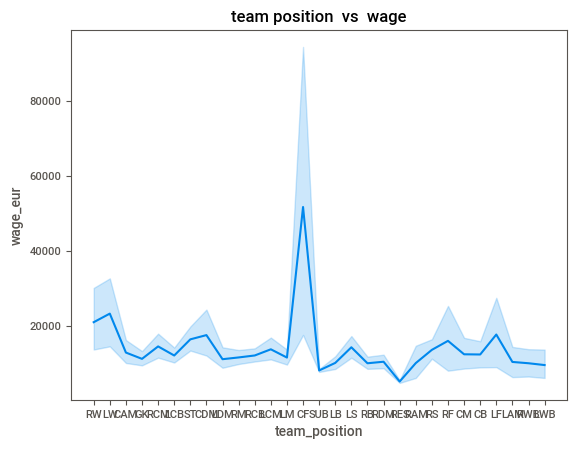

In [ ]:
# 8.relation between team position and wage
sns.lineplot(x='team_position',y='wage_eur',data=data)
plt.title('team position  vs  wage')

### Observation
- Central forward players are getting more wages

Text(0.5, 1.0, 'team position  vs  power stamina')

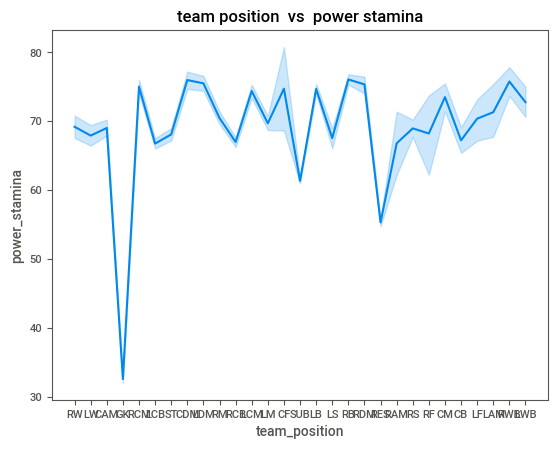

In [ ]:
# 9.relation between team position and power stamina
sns.lineplot(x='team_position',y='power_stamina',data=data)
plt.title('team position  vs  power stamina')

### Observation
- backward players more stamina.

Text(0.5, 1.0, 'team position  vs  movement sprint speed')

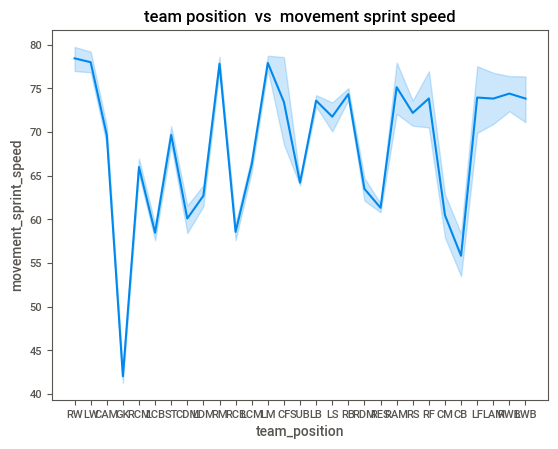

In [ ]:
# 10.relation between team position and movement sprint speed
sns.lineplot(x='team_position',y='movement_sprint_speed',data=data)
plt.title('team position  vs  movement sprint speed')

### Observation
- except goalkeepers others everyone have sprint speed.

Text(0.5, 1.0, 'team position  vs  movement_agility')

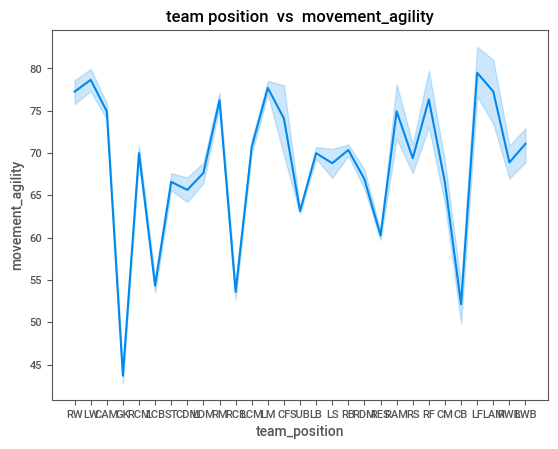

In [ ]:
# 11.relation between team position and movement agility
sns.lineplot(x='team_position',y='movement_agility',data=data)
plt.title('team position  vs  movement_agility')

### Observation
- in every team position players shows different hike and low point.

Text(0.5, 1.0, 'preferred foot  vs  shooting')

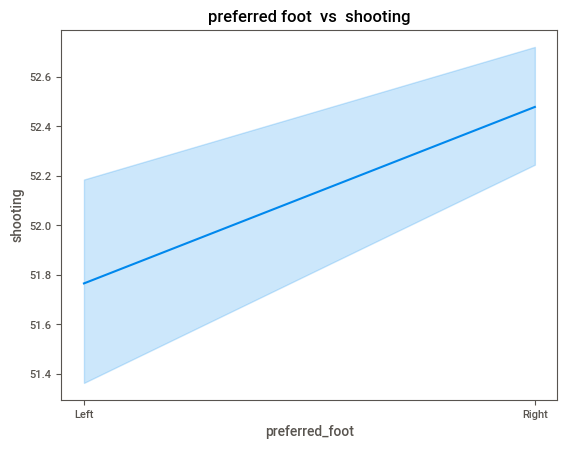

In [ ]:
# 12.relation between preferred foot and shooting
sns.lineplot(x="preferred_foot",y="shooting",data=data)
plt.title('preferred foot  vs  shooting')

### Observation
- Shooting for left & right footed players are almost same.

Text(0.5, 1.0, 'preferred foot  vs  attacking finishing')

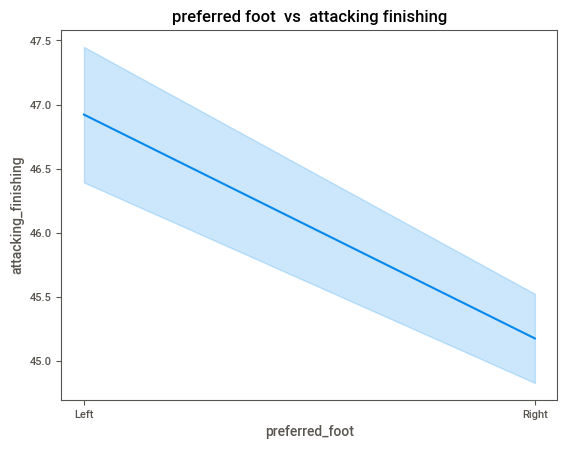

In [ ]:
# 13.relation between preferred foot and attacking finishing
sns.lineplot(x="preferred_foot",y="attacking_finishing",data=data)
plt.title('preferred foot  vs  attacking finishing')

### Observation
- Shooting for left & right footed players are almost same.

Text(0.5, 1.0, 'overall  vs  value')

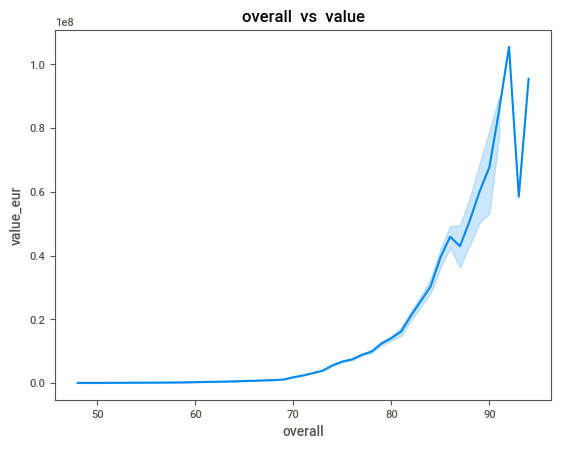

In [ ]:
# 14.relation between overall and value
sns.lineplot(x="overall",y="value_eur",data=data)
plt.title('overall  vs  value')

### Observation
- The overall rating is constant till 70 and after that it increases with the value_eur

Text(0.5, 1.0, 'overall  vs  wage')

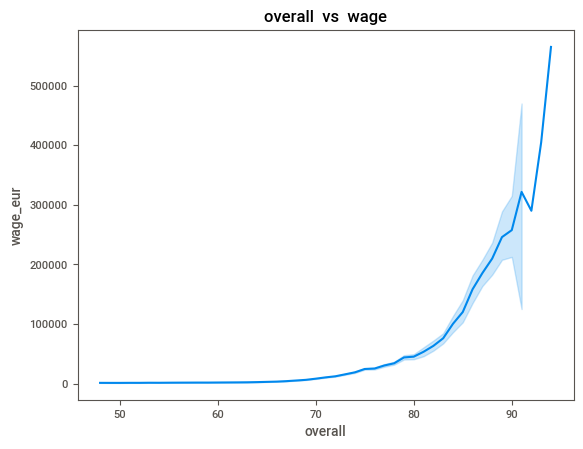

In [ ]:
# 15.relation between overall and wage
sns.lineplot(x="overall",y="wage_eur",data=data)
plt.title('overall  vs  wage')

### Observation
- Wage of the player depends on overall rating, players having high overall rating paid most

Text(0.5, 1.0, 'overall  vs  work rate')

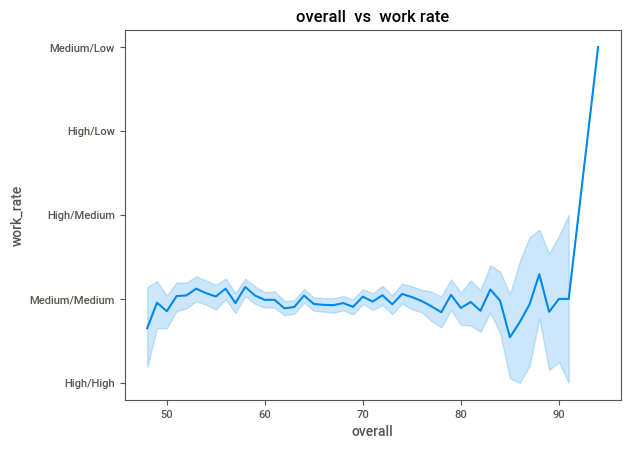

In [ ]:
# 16.relation between overall and work rate
sns.lineplot(x="overall",y="work_rate",data=data)
plt.title('overall  vs  work rate')

### Observation
- Players with high workrate(Both Offensively,Deffensevely) are getting overall rating above 70

Text(0.5, 1.0, 'physic  vs  shooting')

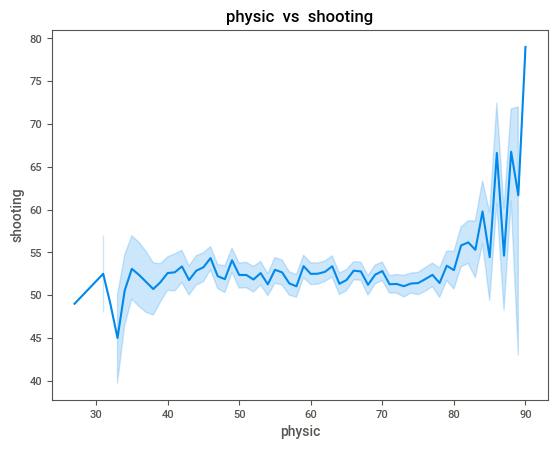

In [ ]:
# 17.relation between physic and shooting
sns.lineplot(x="physic",y="shooting",data=data)
plt.title('physic  vs  shooting')

### Observation
- Shooting increases with physic

Text(0.5, 1.0, 'work rate  vs  wage')

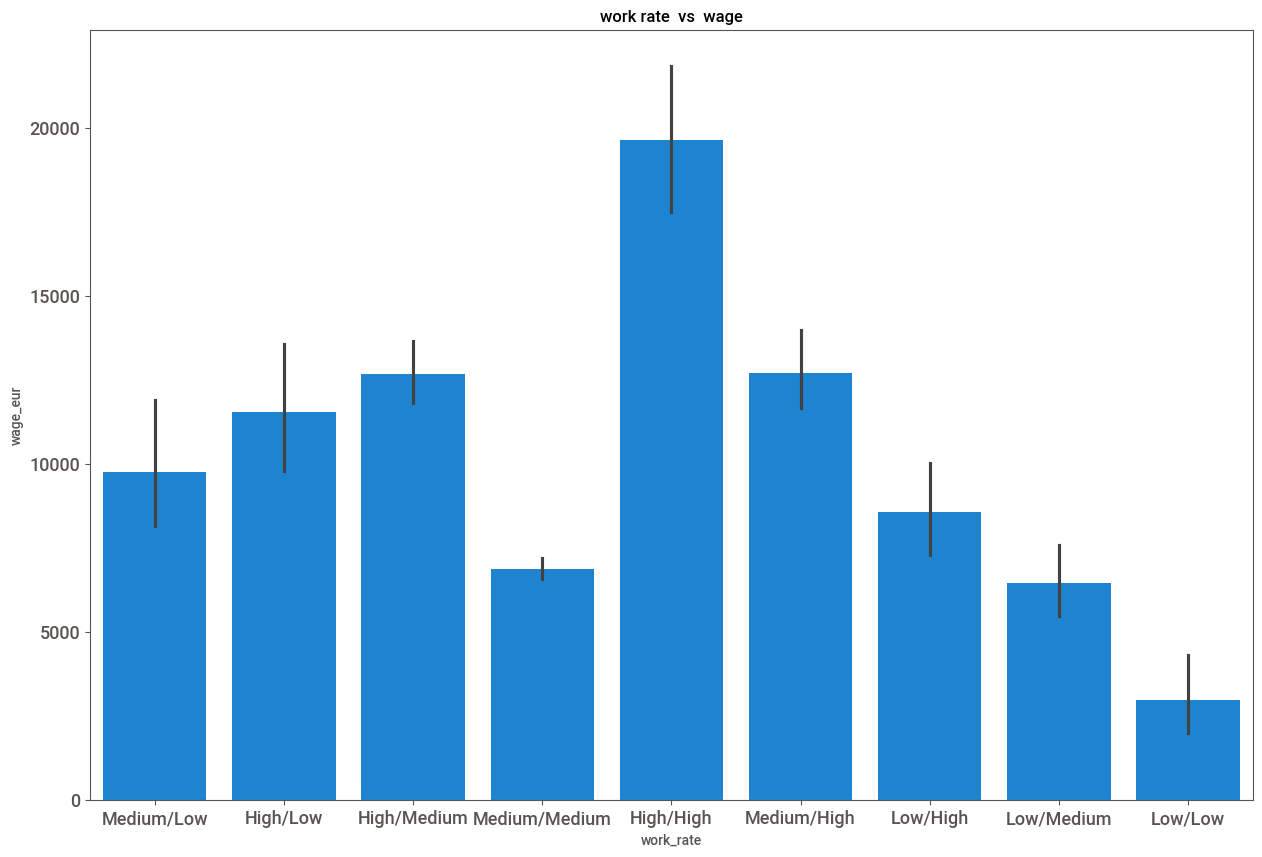

In [ ]:
# 18.relation between work rate and wage
plt.figure(figsize=(15,10))
sns.barplot(x="work_rate",y="wage_eur",data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('work rate  vs  wage')

### Observation
- Players with high workrate(Both Offensively,Deffensevely) are getting high wage.

Text(0.5, 1.0, 'club  vs  wage')

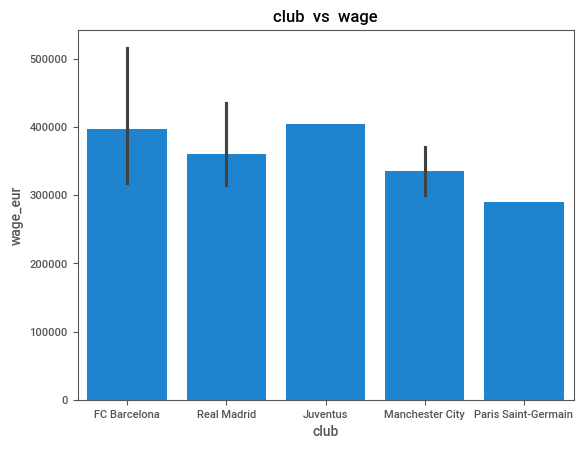

In [ ]:
# 19.checking which club spend more wage

dtw=data.sort_values(["wage_eur"],ascending=False)

sns.barplot(x="club",y="wage_eur",data=dtw.head(12))
plt.title('club  vs  wage')

### Observation
- Real Madrid is spending more wages comparing to other clubs.

Text(0.5, 1.0, 'player  vs  value')

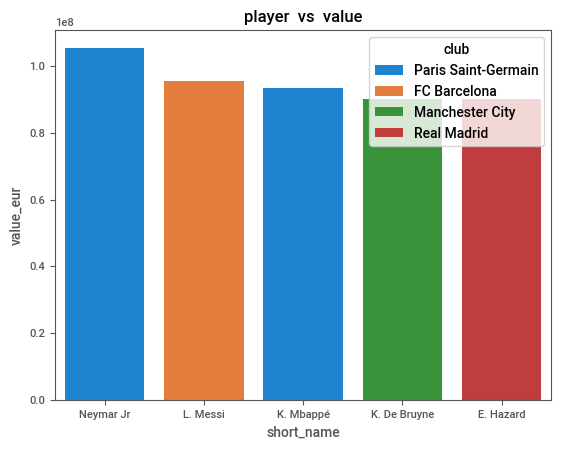

In [ ]:
# 20. checking for most valuable player

dtv=data.sort_values(["value_eur"],ascending=False)

sns.barplot(x="short_name",y="value_eur",data=dtv.head(5),hue="club")
plt.title('player  vs  value')

### Observation
- Most valuable player in FIFA 20  is Neymar Jr followed by L.Messi & K.Mbappe
- When we take top 5 valuable players in FIFA 20, 2 of them are playing for Paris Saint-Germain.

Text(0.5, 1.0, ' player  vs  wage')

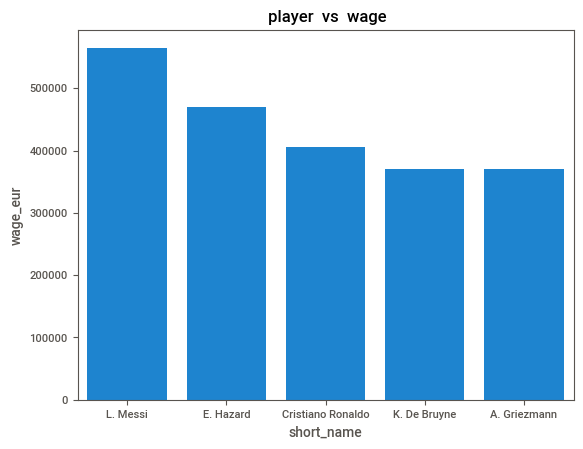

In [ ]:
# 21. checking for which palyer having high wage
sns.barplot(x="short_name",y="wage_eur",data=dtw.head(5))
plt.title(' player  vs  wage')

### Observation
- L.Messi is getting high wage followed by Eden Hazard, Cristiano Ronaldo.

###Checking for most youngest & oldest player

In [ ]:
# for youngest player

dty=data.sort_values(['age'],ascending=True)
dty.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18171,J. Starbuck,16,174,69,England,Grimsby Town,49,72,60000,1000,CM,Right,1,3,2,Medium/Medium,Normal,165000.0,RES,66.0,43.0,51.0,51.0,35.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,44,44,43,57,43,50,46,37,51,50,65,66,58,49,63,48,56,49,45,38,41,22,42,53,40,51,37,38,37,10,11,6,6,14,47,47,47,50,49,49,49,50,51,51,51,51,48,48,48,51,44,43,43,43,44,43,40,40,40,43
4764,A. Hložek,16,185,80,Czech Republic,Sparta Praha,70,86,3500000,1000,"RW, ST, RM",Right,1,3,3,High/Medium,Normal,9900000.0,RM,74.0,68.0,66.0,74.0,30.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,68,67,73,65,66,74,64,61,62,75,73,74,70,68,72,70,70,71,75,68,69,26,68,68,61,69,25,24,23,11,10,9,11,10,70,70,70,70,70,70,70,70,69,69,69,69,63,63,63,69,52,50,50,50,52,49,46,46,46,49
18243,E. Sartorius,16,174,69,England,Lincoln City,48,67,60000,1000,ST,Right,1,3,2,Medium/Medium,Normal,143000.0,SUB,68.0,48.0,36.0,49.0,19.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,29,53,38,39,37,47,31,26,31,47,70,66,58,49,72,41,62,41,34,46,25,17,41,44,54,43,18,16,13,13,10,6,6,15,46,46,46,47,47,47,47,47,46,46,46,45,39,39,39,45,33,30,30,30,33,32,27,27,27,32


In [ ]:
# for oldest player

dto=data.sort_values(["age"],ascending=False)
dto.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13003,H. Sulaimani,42,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,LB,Left,1,3,3,High/Medium,Lean,NaN,LB,47.0,53.0,68.0,64.0,64.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,70,43,61,67,43,63,69,69,68,64,46,47,64,64,68,65,69,58,72,63,92,65,64,68,60,66,62,66,63,15,8,15,14,13,58,58,58,60,60,60,60,60,62,62,62,61,64,64,64,61,62,66,66,66,62,62,66,66,66,62
11832,C. Muñoz,42,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,GK,Right,1,3,1,Medium/Medium,Normal,68000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,64.0,63.0,66.0,61.0,55.0,64.0,25,15,13,36,12,22,19,20,34,31,53,56,33,62,58,50,73,29,65,20,35,25,16,45,24,62,18,14,19,64,63,66,64,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200,G. Buffon,41,192,92,Italy,Juventus,83,83,2600000,58000,GK,Right,4,2,1,Medium/Medium,Normal,4300000.0,SUB,NaN,NaN,NaN,NaN,NaN,NaN,78.0,77.0,74.0,80.0,33.0,91.0,13,15,13,37,17,26,20,13,35,28,37,30,55,80,49,56,71,34,69,13,38,28,12,50,22,70,13,11,11,78,77,74,91,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Young players who have promising future
data.query(" age<22 & overall>80")

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,191700000.0,RW,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,86,86,86,87,87,87,87,87,86,86,86,86,78,78,78,86,66,62,62,62,66,63,54,54,54,63
73,M. de Ligt,19,189,89,Netherlands,Juventus,85,93,50000000,76000,CB,Right,3,4,2,Medium/High,Normal,92500000.0,SUB,67.0,58.0,66.0,68.0,83.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,52,50,85,76,40,66,48,55,74,74,61,72,56,83,60,82,84,77,88,64,82,82,44,63,40,82,86,82,80,12,11,11,12,10,67,67,67,63,65,65,65,63,66,66,66,65,71,71,71,65,74,79,79,79,74,76,82,82,82,76
74,G. Donnarumma,20,196,90,Italy,Milan,85,92,41500000,34000,GK,Right,3,3,1,Medium/Medium,Normal,78900000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,90.0,80.0,74.0,90.0,50.0,80.0,12,12,12,34,8,28,12,14,24,28,46,54,64,79,38,56,72,34,72,18,30,26,14,50,24,68,20,14,16,90,80,74,80,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,J. Sancho,19,180,76,England,Borussia Dortmund,84,92,44500000,61000,"RM, LM",Right,2,4,5,Medium/Low,Lean,82300000.0,RM,88.0,72.0,77.0,90.0,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,78,78,37,83,80,92,81,48,59,88,89,87,91,84,90,68,51,77,59,62,43,29,78,83,57,80,32,45,34,7,11,10,11,13,75,75,75,83,81,81,81,83,82,82,82,83,75,75,75,83,64,58,58,58,64,59,47,47,47,59
109,K. Havertz,20,188,83,Germany,Bayer 04 Leverkusen,84,92,46000000,70000,"CAM, RM",Left,1,4,4,Medium/Medium,Lean,87400000.0,RF,84.0,78.0,79.0,84.0,44.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,73,81,74,85,80,84,79,53,78,87,77,89,78,82,73,73,69,82,65,75,41,38,83,82,69,84,39,46,38,6,8,11,10,12,80,80,80,82,82,82,82,82,82,82,82,82,78,78,78,82,65,63,63,63,65,62,54,54,54,62
160,T. Alexander-Arnold,20,180,69,England,Liverpool,83,89,32000000,78000,RB,Right,1,4,3,High/Medium,Lean,65600000.0,RB,80.0,62.0,82.0,78.0,78.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,88,56,68,81,50,76,82,80,82,82,79,81,74,82,74,76,66,83,62,63,73,79,73,78,55,75,76,83,79,14,15,14,6,7,71,71,71,76,75,75,75,76,76,76,76,78,79,79,79,78,81,79,79,79,81,80,76,76,76,80
161,L. Jović,21,182,85,Serbia,Real Madrid,83,89,36500000,155000,ST,Right,1,5,3,Medium/Medium,Stocky,82100000.0,SUB,77.0,82.0,68.0,81.0,29.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,67,86,79,74,84,81,77,46,58,83,76,77,78,83,77,83,75,76,78,76,62,23,84,70,66,79,25,26,16,8,7,12,9,13,81,81,81,78,80,80,80,78,77,77,77,77,69,69,69,77,55,53,53,53,55,51,47,47,47,51
171,M. Rashford,21,186,70,England,Manchester United,83,88,35500000,125000,"ST, LM",Right,2,3,5,High/High,Lean,70100000.0,LM,92.0,82.0,73.0,84.0,45.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,74,81,72,75,76,85,82,76,63,83,89,94,86,81,75,88,72,87,75,79,73,42,84,75,76,78,47,40,33,11,6,15,7,14,81,81,81,82,82,82,82,82,80,80,80,81,73,73,73,81,65,62,62,62,65,62,57,57,57,62
238,L. Bailey,21,178,79,Jamaica,Bayer 04 Leverkusen,82,88,30500000,65000,"LW, RW",Left,1,4,4,Medium/Medium,Normal,580

In [ ]:
# most valuable player in every position
most_valuable_players_list = []

for position in data['team_position'].unique():
    position_data = data[data['team_position'] == position]
    if not position_data.empty:
        most_valuable_player = position_data.loc[position_data['value_eur'].idxmax(), 'short_name']
        most_valuable_players_list.append({'team_position': position, 'short_name': most_valuable_player})

most_valuable_players = pd.DataFrame(most_valuable_players_list)

print(most_valuable_players)

   team_position           short_name
0             RW             L. Messi
1             LW            E. Hazard
2            CAM            Neymar Jr
3             GK             J. Oblak
4            RCM         K. De Bruyne
5            LCB          V. van Dijk
6             ST              H. Kane
7            CDM      Sergio Busquets
8            LDM             P. Pogba
9             RM           C. Eriksen
10           RCB           Marquinhos
11           LCM             T. Kroos
12            LM               H. Son
13            CF      Roberto Firmino
14           SUB              L. Sané
15            LB         A. Robertson
16            LS           L. Insigne
17            RB           J. Kimmich
18           RDM  S. Milinković-Savić
19           RES            M. Icardi
20           RAM            H. Ziyech
21            RS             A. Milik
22            RF           K. Havertz
23            CM         Luis Alberto
24            CB           S. de Vrij
25          

In [ ]:
dti=data[data["nationality"]=='India']
dti.sort_values(by="potential",ascending=False)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12155,G. Chatterjee,33,195,84,India,India,64,64,0,0,GK,Right,1,3,1,Medium/Medium,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,68.0,69.0,60.0,30.0,61.0,13,6,27,18,13,12,23,12,27,25,34,26,43,57,41,52,55,38,71,13,40,26,16,15,25,21,18,7,9,64,68,69,61,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13103,B. Raj,31,175,69,India,India,63,63,0,0,RB,Right,1,2,2,Medium/Medium,Normal,NaN,NaN,76.0,44.0,58.0,59.0,59.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,61,35,57,60,39,58,61,49,58,51,75,77,81,52,71,51,64,76,53,57,73,58,50,51,42,61,60,59,61,11,12,11,16,8,51,51,51,56,53,53,53,56,55,55,55,57,56,56,56,57,61,58,58,58,61,61,59,59,59,61
13102,P. Bhatt,34,182,78,India,India,63,63,0,0,ST,Left,1,3,2,Medium/High,Normal,NaN,NaN,71.0,62.0,51.0,61.0,29.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,42,64,58,54,57,61,51,58,48,60,75,67,64,61,57,61,70,71,73,58,63,25,61,57,65,68,12,37,37,10,14,9,6,10,62,62,62,59,61,61,61,59,59,59,59,59,55,55,55,59,47,46,46,46,47,46,44,44,44,46
13970,A. Chakraborty,33,189,79,India,India,62,62,0,0,CB,Left,1,3,2,Medium/High,Lean,NaN,NaN,37.0,44.0,46.0,41.0,61.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,41,39,64,52,51,38,42,35,47,50,38,37,32,51,33,61,64,71,84,42,61,62,29,44,30,55,61,58,60,16,6,13,7,13,47,47,47,41,43,43,43,41,43,43,43,44,48,48,48,44,53,57,57,57,53,54,61,61,61,54
13971,H. Bhandari,30,178,74,India,India,62,62,0,0,"RM, LM",Right,1,3,3,Medium/Medium,Lean,NaN,NaN,77.0,48.0,57.0,64.0,37.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,56,41,41,60,51,65,66,57,51,63,79,75,65,58,64,55,57,62,65,49,69,41,59,57,59,52,26,44,41,12,15,16,6,7,55,55,55,60,59,59,59,60,59,59,59,61,56,56,56,61,53,51,51,51,53,51,47,47,47,51
13972,A. Swaminathan,27,173,65,India,India,62,62,0,0,"CAM, LM",Left,1,4,3,Medium/Medium,Lean,NaN,NaN,60.0,50.0,61.0,65.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,57,47,55,64,54,61,53,55,60,64,63,57,84,60,84,55,60,53,34,51,31,29,61,63,43,56,28,25,27,14,8,13,13,9,55,55,55,60,59,59,59,60,61,61,61,60,57,57,57,60,47,45,45,45,47,44,37,37,37,44
15204,A. Ginti,25,170,69,India,India,60,62,0,0,"LB, LM",Left,1,3,2,Medium/High,Normal,NaN,NaN,82.0,44.0,52.0,61.0,56.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,57,40,45,51,38,58,57,52,45,61,80,83,72,55,76,54,70,60,43,38,56,54,61,54,50,55,57,59,58,12,14,14,12,8,53,53,53,58,56,56,56,58,56,56,56,58,53,53,53,58,59,54,54,54,59,59,55,55,55,59
15205,A. Khurana,26,186,81,India,India,60,62,0,0,CB,Right,1,3,2,Medium/Medium,Normal,NaN,NaN,54.0,30.0,41.0,41.0,58.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,34,21,57,53,24,38,32,25,42,45,51,57,39,53,42,42,63,59,79,37,64,59,27,34,36,53,58,58,55,15,8,10,12,15,41,41,41,40,40,40,40,40,40,40,40,42,45,45,45,42,51,54,54,54,51,53,59,59,59,53
14625,D. Pillai,31,178,70,India,India,61,61,0,0,"RM, RW",Right,1,3,3,Medium/Medium,Lean,NaN,NaN,70.0,50.0,58.0,61.0,45.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,61,45,42,57,56,60,61,57,55,62,72,69,67,61,61,59,53,68,61,53,61,57,57,60,40,69,30,50,51,11,14,13,13,14,55,55,55,59,58,58,58,59,58,58,58,60,58,58,58,60,57,55,55,55,57,56,51,51

In [ ]:
dti.shape

(23, 91)

- Total 23 Indian players in the FIFA 20 .
- 33 yr old G. Chatterjee has highest overall rating 64

#### 1.Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [ ]:
top_ten=data["nationality"].value_counts()[:10]
top_ten

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with most players')

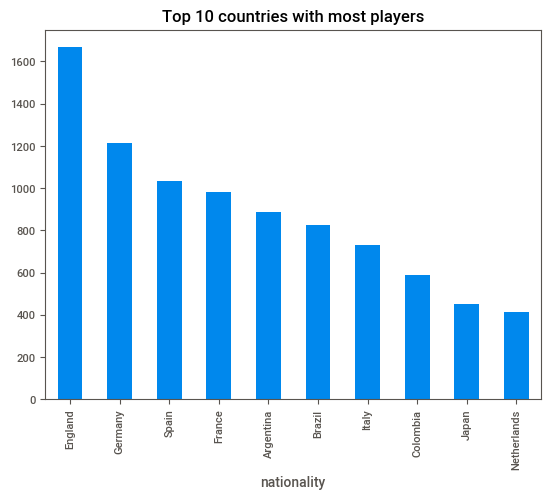

In [ ]:
top_ten.plot(kind='bar')
plt.title("Top 10 countries with most players")

#### observation
England has the most players in FIFA 20, followed by Germany,Spain.

#### 2.Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

<Axes: xlabel='age', ylabel='overall'>

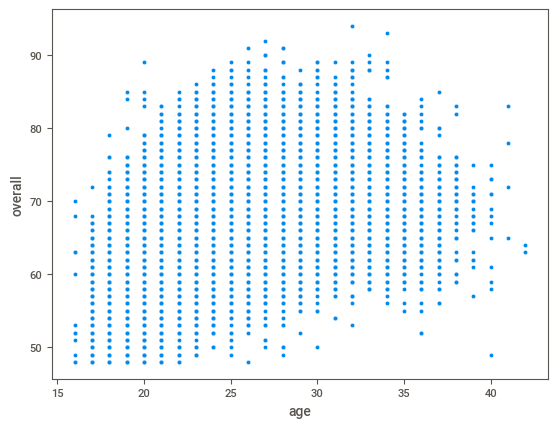

In [ ]:
sns.scatterplot(x="age",y="overall",data=data)

###**Observation**
- Interpreting the plot, we can see that there is a general trend of higher overall ratings for younger players.   Most of the top-rated players in the dataset are in their mid-20s, with the highest overall rating achieved by players in their late 20s or early 30s. Based on the scatter plot,
it appears that the peak age for overall rating is around 27-28 years old, after which there is a slight decline. However, there are still many high-rated players in their 30s and even 40s, indicating that some players may continue to improve or maintain their skills with age, depending on factors such as physical fitness, experience, and tactical knowledge. Therefore, we cannot say with certainty that there is a specific age after which a player stops improving, as this can vary widely depending on individual circumstances.

- Player reaches his maximum potential during the middle of his career, usually in between 25-35 years of age.

#### 3.Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

<Axes: xlabel='team_position', ylabel='wage_eur'>

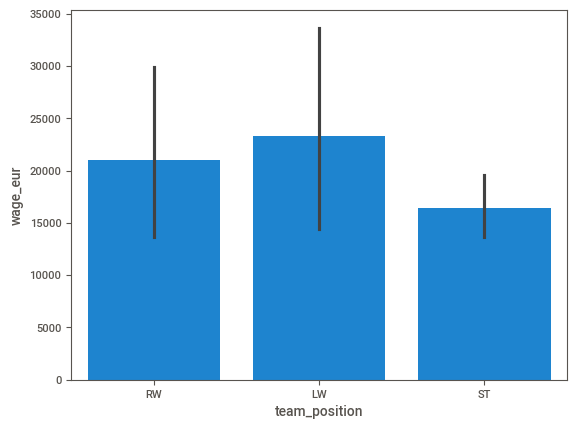

In [ ]:
da=data.query("team_position=='RW' | team_position=='LW' | team_position=='ST'")

sns.barplot(x="team_position",y="wage_eur",data=da)

#### observation
left wingers are paid most

##**DATA PRE-PROCESSING**

In [ ]:
# finding missing values
pd.set_option("display.max_rows",None)
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
release_clause_eur             1298
team_position                   240
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                  

In [ ]:
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61


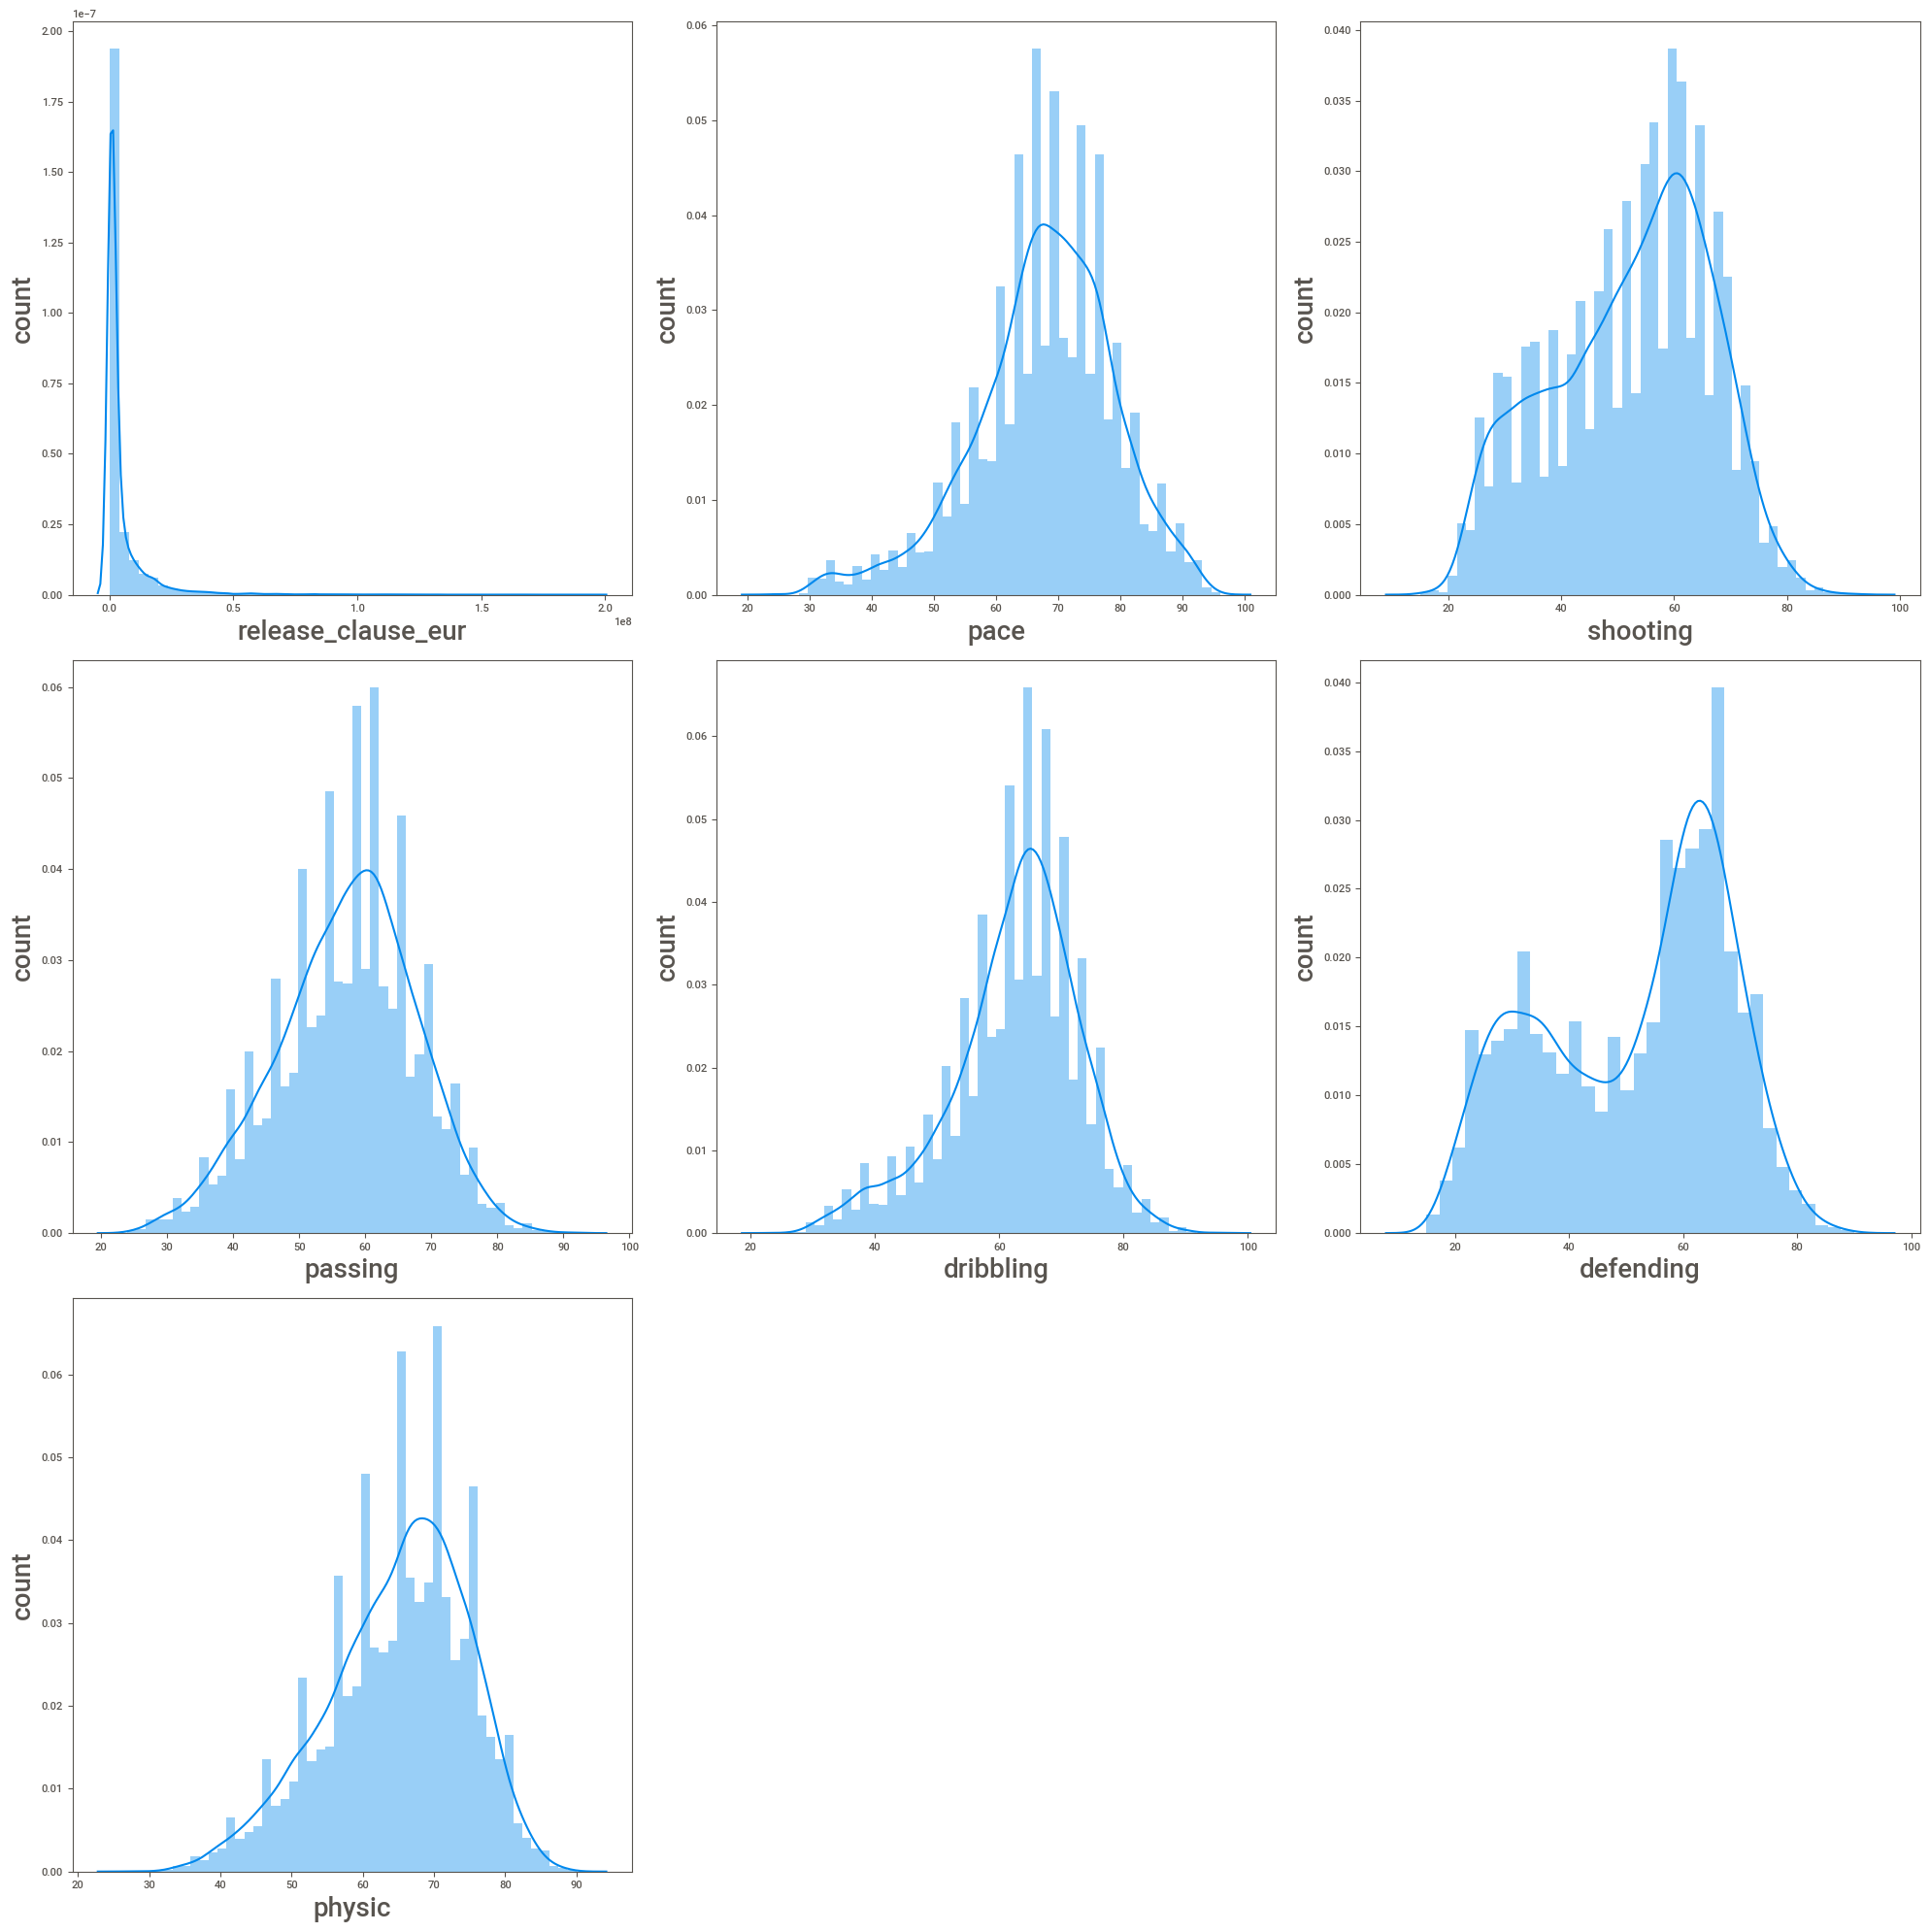

In [ ]:
num=data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,20))
plotnumber=1
for i in num:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(x=data[i],kde=True)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

the plot shows that there are positive and negative skewed distribution. so we

---

use median to replace the null values

In [ ]:
data['release_clause_eur'].fillna(data['release_clause_eur'].median(),inplace=True)
data['pace'].fillna(data['pace'].median(),inplace=True)
data['shooting'].fillna(data['shooting'].median(),inplace=True)
data['passing'].fillna(data['passing'].median(),inplace=True)
data['dribbling'].fillna(data['dribbling'].median(),inplace=True)
data['defending'].fillna(data['defending'].median(),inplace=True)
data['physic'].fillna(data['physic'].median(),inplace=True)

In [ ]:
# team position is a object . we use mode to replace its null values
mode_value = data['team_position'].mode()[0]
data['team_position']=data['team_position'].fillna(mode_value)

In [ ]:
ngk=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
data[ngk]=data[ngk].fillna(0)

In [ ]:
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
release_clause_eur            0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attackin

All null values are replaced

In [ ]:
# checking for duplicates
data.duplicated().sum()

0

There is no duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

HANDLING CATEGORICAL DATA

In [ ]:
# splitting work_rate column
data[["attack_work_rate","defense_work_rate"]]=data["work_rate"].str.split('/',expand=True)
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Medium,Low
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,High,Low
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,High,Medium
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Medium,Medium
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,High,Medium


##**ENCODING**

In [ ]:
# preferred foot
data["preferred_foot"]=data["preferred_foot"].map({"Right":1 , "Left":0})

In [ ]:
data["attack_work_rate"]=data["attack_work_rate"].map({'Low':0 , 'Medium':0.5 , 'High':1})
data["defense_work_rate"]=data["defense_work_rate"].map({'Low':0 , 'Medium':0.5 , 'High':1})

In [ ]:
# team position
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [ ]:
# droping some unique columns
data.drop(["nationality","club","player_positions","work_rate","body_type"],inplace=True,axis=1)

In [ ]:
data.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate
0,L. Messi,32,170,72,94,94,95500000,565000,0,5,4,4,195800000.0,9,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0.5,0.0
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,1,5,4,5,96500000.0,10,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,1.0,0.0
2,Neymar Jr,27,175,68,92,92,105500000,290000,1,5,5,5,195200000.0,16,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,1.0,0.5
3,J. Oblak,26,188,87,91,93,77500000,125000,1,3,3,1,164700000.0,26,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5
4,E. Hazard,28,175,74,91,91,90000000,470000,1,4,4,4,184500000.0,10,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,1.0,0.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   preferred_foot              18278 non-null  int64  
 9   international_reputation    18278 non-null  int64  
 10  weak_foot                   18278 non-null  int64  
 11  skill_moves                 18278 non-null  int64  
 12  release_clause_eur          18278 non-null  float64
 13  team_position               182

For the clustering we are taking players having overall rating > 86

In [ ]:
data=data[data.overall >86]
data

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate
0,L. Messi,32,170,72,94,94,95500000,565000,0,5,4,4,195800000.0,9,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0.5,0.0
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,1,5,4,5,96500000.0,10,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,1.0,0.0
2,Neymar Jr,27,175,68,92,92,105500000,290000,1,5,5,5,195200000.0,16,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,1.0,0.5
3,J. Oblak,26,188,87,91,93,77500000,125000,1,3,3,1,164700000.0,26,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5
4,E. Hazard,28,175,74,91,91,90000000,470000,1,4,4,4,184500000.0,10,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,1.0,0.5
5,K. De Bruyne,28,181,70,91,91,90000000,370000,1,4,5,4,166500000.0,20,76.0,86.0,92.0,86.0,61.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1.0,1.0
6,M. ter Stegen,27,187,85,90,93,67500000,250000,1,3,4,1,143400000.0,26,69.0,54.0,58.0,64.0,56.0,66.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5
7,V. van Dijk,27,193,92,90,91,78000000,200000,1,3,3,2,150200000.0,24,77.0,60.0,70.0,71.0,90.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,69,69,69,67,69,69,69,67,69,69,69,69,74,74,74,69,79,83,83,83,79,81,87,87,87,81,0.5,0.5
8,L. Modrić,33,172,66,90,90,45000000,340000,1,4,4,4,92300000.0,20,74.0,76.0,89.0,89.0,72.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,77,77,77,84,83,83,83,84,86,86,86,85,87,87,87,85,81,81,81,81,81,79,72,72,72,79,1.0,1.0
9,M. Salah,27,175,71,90,90,80500000,240000,0,3,3,4,148900000.0,9,93.0,86.0,81.0,89.0,45.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,5

##**CHECKING FOR OUTLIERS**

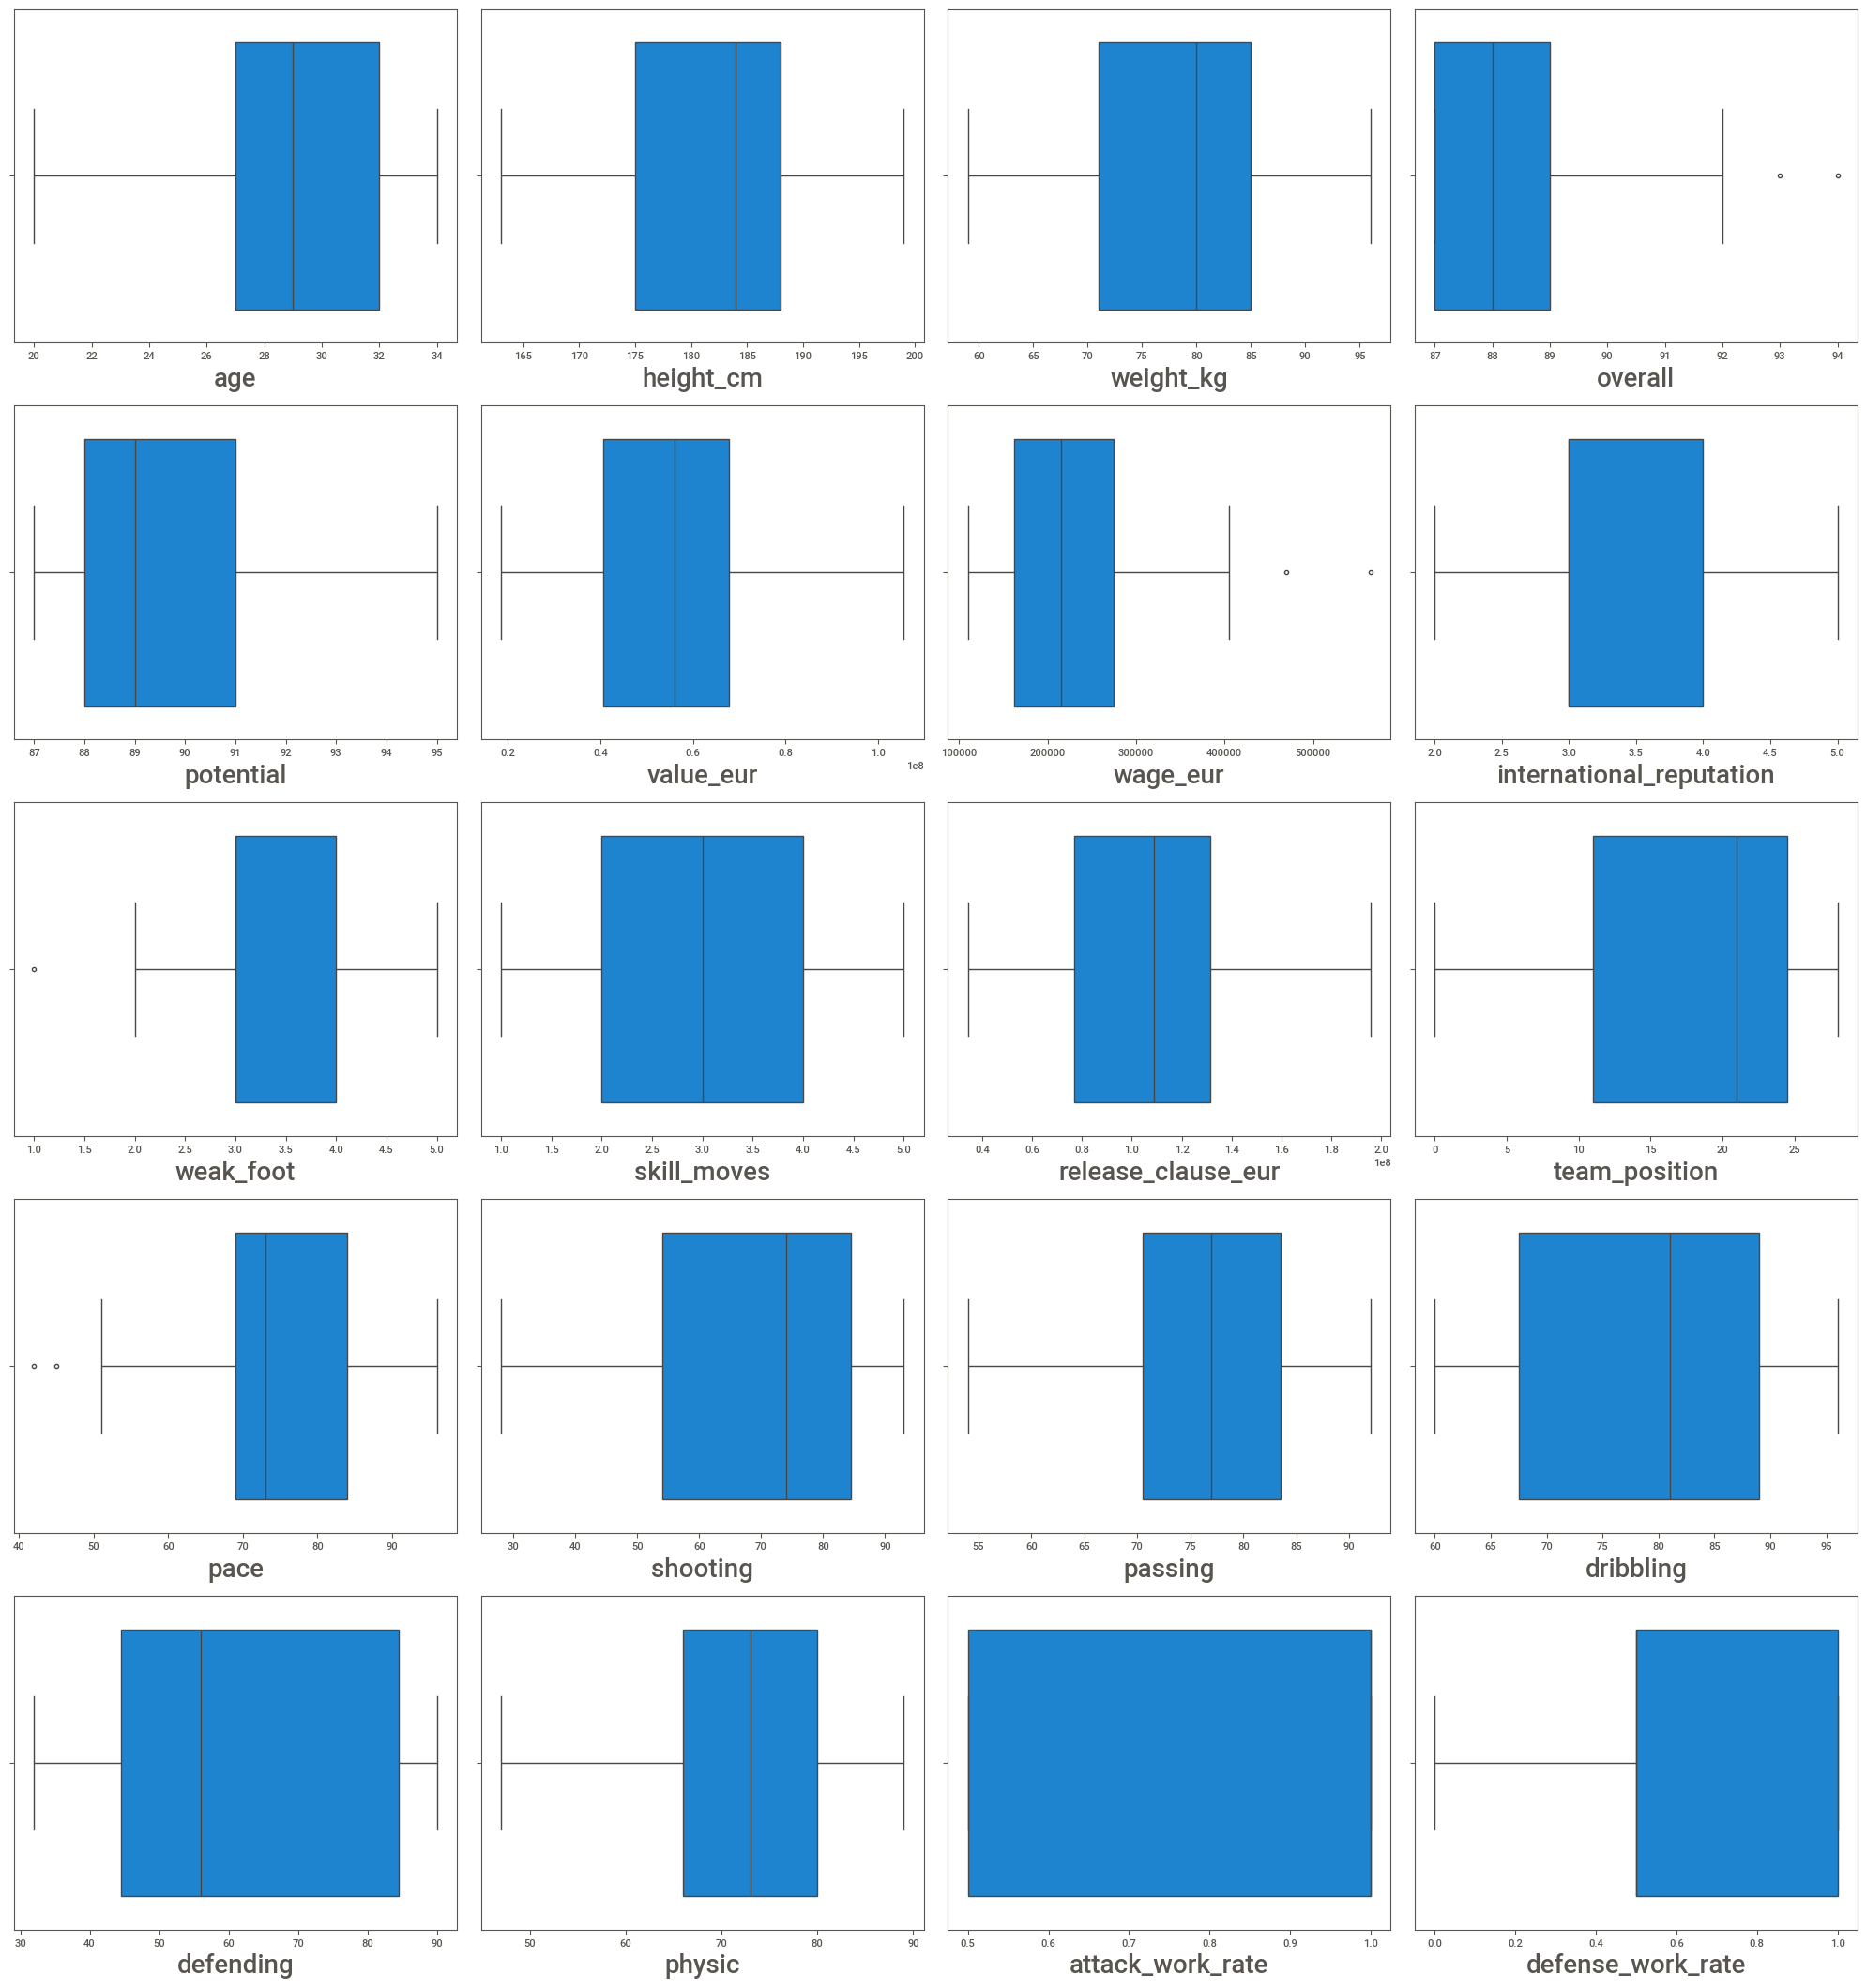

In [ ]:
do=data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','international_reputation','weak_foot','skill_moves','release_clause_eur','team_position','pace','shooting','passing','dribbling','defending','physic','attack_work_rate','defense_work_rate']]

plt.figure(figsize=(20,25))
p=1
for i in do:
    ax=plt.subplot(6,4,p)
    sns.boxplot(x=do[i])
    plt.xlabel(i,fontsize=20)
    p+=1
plt.tight_layout()

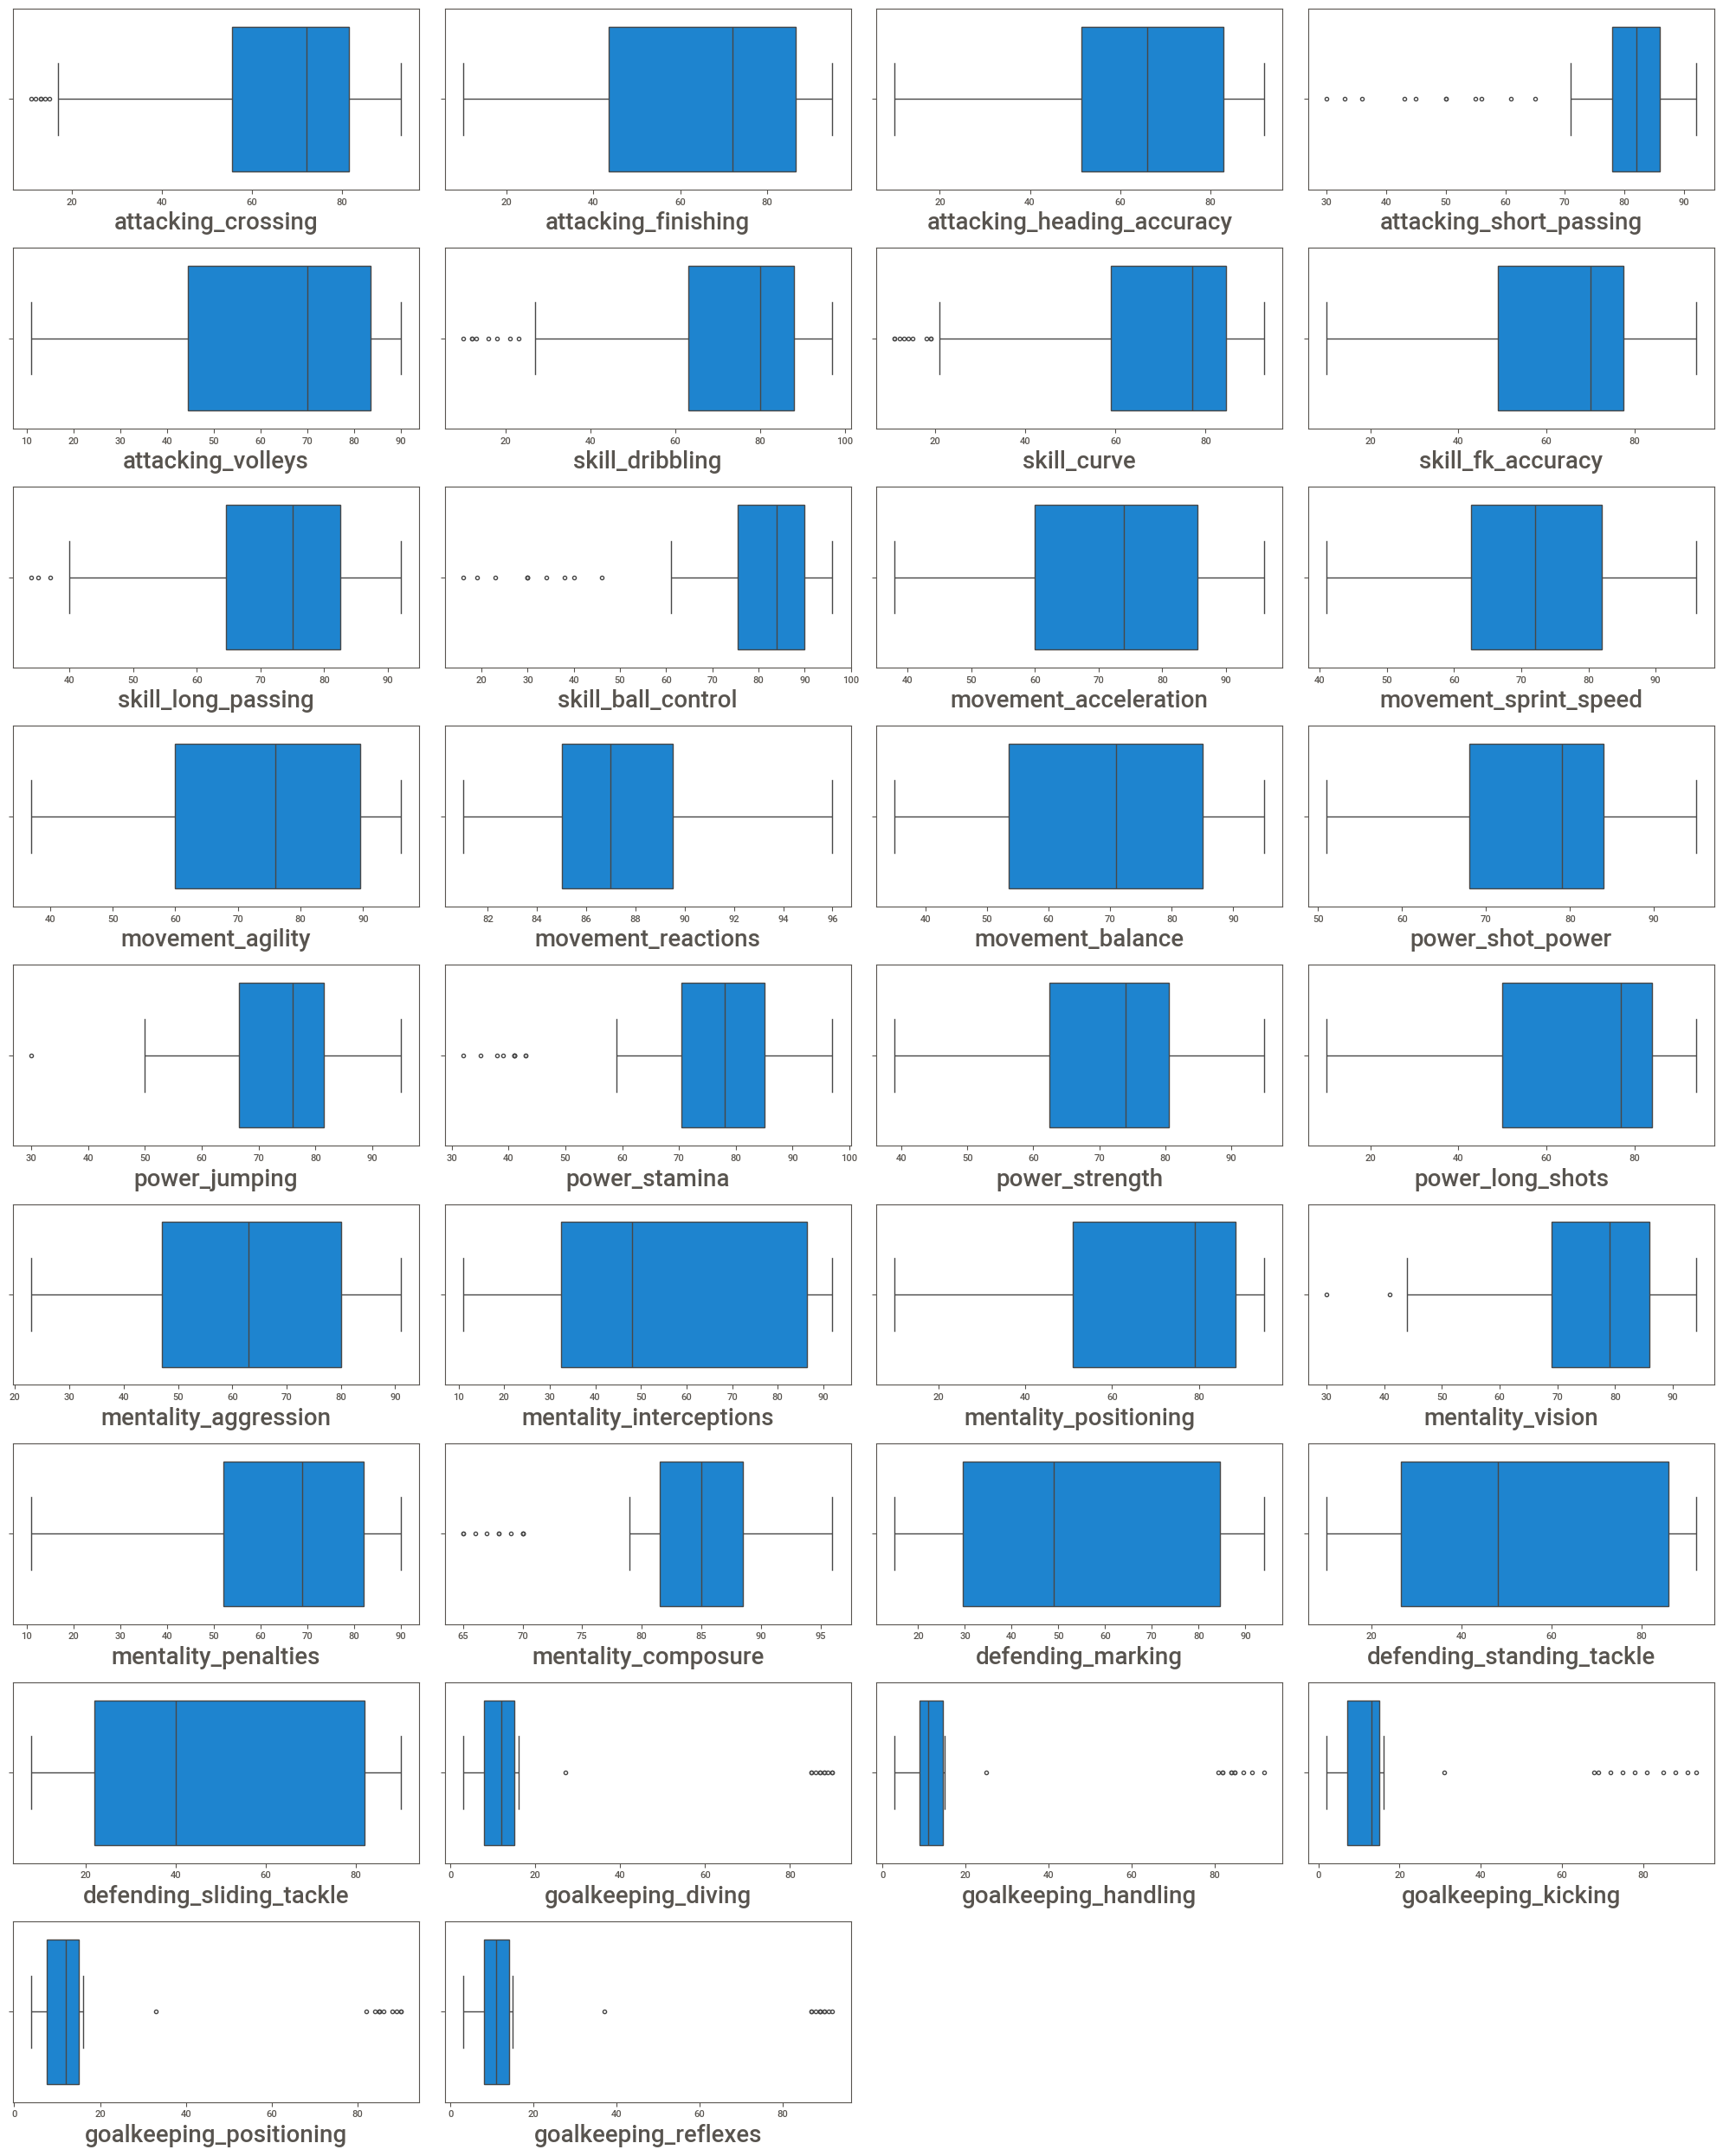

In [ ]:
ds=data[['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']]

plt.figure(figsize=(20,25))
p=1
for i in ds:
    ax=plt.subplot(9,4,p)
    sns.boxplot(x=ds[i])
    plt.xlabel(i,fontsize=20)
    p+=1
plt.tight_layout()

##**FEATURE SELECTION**

In [ ]:
dm=data.drop('short_name',axis=1)

In [ ]:
dm.corr()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate
age,1.000000,0.091971,0.042317,-0.003344,-0.513687,-0.701054,0.109884,0.068673,0.498440,-0.127888,-0.151242,-0.706991,0.273682,-0.295573,-0.122105,-0.081400,-0.198102,0.239010,0.122684,-0.019247,-0.028624,-0.046682,-0.023476,-0.014827,-0.029590,-0.062951,-0.094239,0.131310,-0.047214,-0.023399,-0.098073,-0.051248,-0.032321,-0.014984,-0.057911,-0.201309,-0.240821,-0.183359,-0.091333,-0.143439,-0.072163,0.311785,-0.119914,0.107671,-0.047238,0.165919,0.237872,-0.087384,-0.194348,0.070227,0.045554,0.202270,0.160521,0.177287,-0.027280,-0.017730,-0.040396,-0.023900,-0.004138,-0.021242,-0.021242,-0.021242,-0.047052,-0.040572,-0.040572,-0.040572,-0.047052,-0.036468,-0.036468,-0.036468,-0.043825,-0.000542,-0.000542,-0.000542,-0.043825,0.048033,0.082703,0.082703,0.082703,0.048033,0.068762,0.135538,0.135538,0.135538,0.068762,-0.086300,0.022203
height_cm,0.091971,1.000000,0.900429,-0.081026,-0.002932,-0.260039,-0.281334,0.089883,0.070833,-0.258342,-0.597847,-0.229561,0.486330,-0.562045,-0.532320,-0.634385,-0.760490,0.358255,0.423598,0.473317,0.479178,0.467793,0.473668,0.468834,0.475913,-0.641371,-0.591458,-0.101819,-0.572641,-0.560620,-0.646329,-0.592351,-0.529495,-0.427342,-0.584962,-0.733051,-0.557125,-0.801990,-0.385685,-0.890861,-0.358286,0.287367,-0.516633,0.620070,-0.587734,-0.050444,0.026754,-0.626006,-0.607494,-0.464300,-0.417810,0.048376,-0.029031,0.023860,0.459315,0.460697,0.458828,0.471007,0.455850,-0.537007,-0.537007,-0.537007,-0.603179,-0.582780,-0.582780,-0.582780,-0.603179,-0.585479,-0.585479,-0.585479,-0.591599,-0.529141,-0.529141,-0.529141,-0.591599,-0.430173,-0.355810,-0.355810,-0.355810,-0.430173,-0.378278,-0.211298,-0.211298,-0.211298,-0.378278,-0.407252,0.016445
weight_kg,0.042317,0.900429,1.000000,-0.004605,0.093768,-0.180530,-0.234719,0.043511,0.070974,-0.316529,-0.640033,-0.145930,0.499540,-0.471450,-0.550585,-0.664947,-0.742021,0.346329,0.434567,0.472491,0.482251,0.474125,0.473074,0.464370,0.479983,-0.657021,-0.604262,-0.081511,-0.591669,-0.571287,-0.632515,-0.616524,-0.560332,-0.427479,-0.600104,-0.667447,-0.489197,-0.773030,-0.292451,-0.812456,-0.355411,0.328180,-0.524935,0.672098,-0.595464,-0.064095,-0.009679,-0.639021,-0.616430,-0.487006,-0.415541,0.034226,-0.040142,0.014929,0.474253,0.475990,0.474956,0.485469,0.466124,-0.535967,-0.535967,-0.535967,-0.603073,-0.584317,-0.584317,-0.584317,-0.603073,-0.588385,-0.588385,-0.588385,-0.591522,-0.535328,-0.535328,-0.535328,-0.591522,-0.434497,-0.364317,-0.364317,-0.364317,-0.434497,-0.381823,-0.215449,-0.215449,-0.215449,-0.381823,-0.419503,0.007428
overall,-0.003344,-0.081026,-0.004605,1.000000,0.754051,0.619223,0.656666,0.030178,0.491050,0.253516,0.174560,0.616748,-0.138371,0.292134,0.250305,0.156012,0.236971,-0.296717,0.005113,0.015572,0.024619,0.024448,0.017574,0.002935,0.023873,0.083360,0.159490,0.010504,0.072780,0.131052,0.109321,0.079855,0.098553,0.091997,0.078346,0.195568,0.232316,0.187884,0.626193,0.113549,0.202084,

In [ ]:
plt.figure(figsize=(150,150))
sns.heatmap(dm.corr(),annot=True,cmap="RdYlGn",annot_kws={"size":40})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
def correlation(dmset, threshold):
    col_corr = set()
    corr_matrix = dmset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(dm,0.95)
len(set(corr_features))

46

In [ ]:
corr_features

{'attacking_volleys',
 'cam',
 'cb',
 'cdm',
 'cf',
 'cm',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'gk_speed',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'ls',
 'lw',
 'lwb',
 'mentality_positioning',
 'power_long_shots',
 'ram',
 'rb',
 'rcb',
 'rcm',
 'rdm',
 'release_clause_eur',
 'rf',
 'rm',
 'rs',
 'rw',
 'rwb',
 'skill_ball_control',
 'skill_curve',
 'skill_dribbling',
 'skill_fk_accuracy',
 'st'}

dropping high correlated columns

In [ ]:
data.drop(corr_features,inplace=True,axis=1)

In [ ]:
data.shape

(55, 42)

##**SCALING**

#### Min-Max Scaling
- Only in continues data
- Using MinMAx scaler becuase dataset contains some outliers, so outliers is going to be biased

In [ ]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(dm)

##**PCA - Principal Component Analysis**

 Principal Component Analysis (PCA) is justified to reduce dimensionality, tackle multicollinearity, and improve the interpretability and visualization of the dataset. PCA will transform the dataset into a streamlined form, capturing the most significant features of player performance and allowing for more effective modeling.

In [ ]:
pca=PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data_scaled))
reduced

,0,1
0,-1.693462,-1.505758
1,-1.526879,-1.318295
2,-1.533649,-1.753984
3,5.091349,-0.421371
4,-1.501245,-1.498221
5,-1.754336,-0.408780
6,5.011614,-0.326217
7,-0.695186,1.530937
8,-1.710935,-0.002578
9,-1.464331,-0.979643


##**MODEL CREATION**

##**MODEL 1 - KMEANS**

In [ ]:
# specify the number of clusters
kmeans = KMeans(n_clusters=12,random_state=15)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [ ]:
kmeans

KMeans(n_clusters=12, random_state=15)

In [ ]:
centroid

array([[-1.2035903 , -1.24252115],
       [ 5.05984168, -0.28553219],
       [-0.60139437,  1.67045779],
       [-1.1957062 , -0.58545519],
       [ 0.02198533,  2.16412813],
       [-1.32011127,  0.46207083],
       [-1.20234586,  1.14329052],
       [-1.33783265, -0.87794221],
       [-1.56380871, -1.51906448],
       [-1.70264237, -0.47656885],
       [-0.89907673,  1.44283524],
       [-1.47013749,  0.0501621 ]])

In [ ]:
labels

array([ 8,  8,  8,  1,  8,  9,  1,  2, 11,  7,  0,  4,  3,  1,  1,  6,  4,
        0,  6,  3,  3, 10,  9,  7, 11,  1,  0,  3,  1,  2,  1,  1,  1,  3,
       11,  4,  5,  7,  3,  7,  2,  3, 10,  7,  6,  2,  3, 10,  0, 10,  2,
        5, 11,  1,  0], dtype=int32)

###**Find Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
score=silhouette_score(reduced,labels)
print(f'k-Means clustering silhouette score:{score: .2f}')

k-Means clustering silhouette score: 0.57


####To improve the score we should take optimal K value

##**Elbow Method**

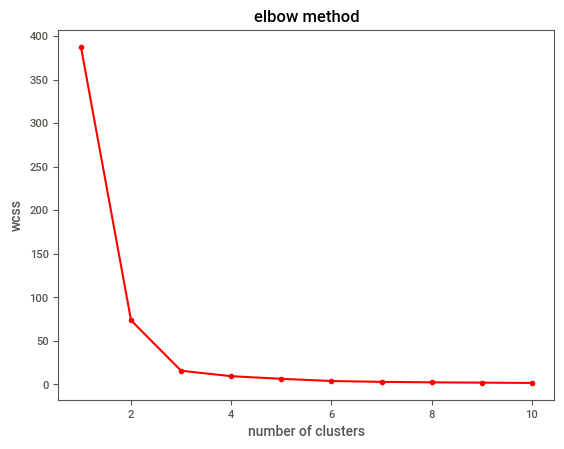

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=30)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o',color='r')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

###From the Elbow method we can choose 3 as K value.

In [ ]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=3,random_state=15)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [ ]:
clusters

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0]

In [ ]:
from sklearn.metrics import silhouette_score
score=silhouette_score(reduced,labels)
print(f'k-Means clustering silhouette score:{score: .2f}')

k-Means clustering silhouette score: 0.74


##**MODEL 2 - HIERARCHICAL CLUSTERING**

In [ ]:
hierachical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
labels1 = hierachical_clustering.fit_predict(reduced)

In [ ]:
labels1

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0])

In [ ]:
score1=silhouette_score(reduced,labels1)
print(f'Hierarchical Clustering clustering silhouette score:{score1: .2f}')

Hierarchical Clustering clustering silhouette score: 0.74


##**MODEL 3 - DBSCAN**

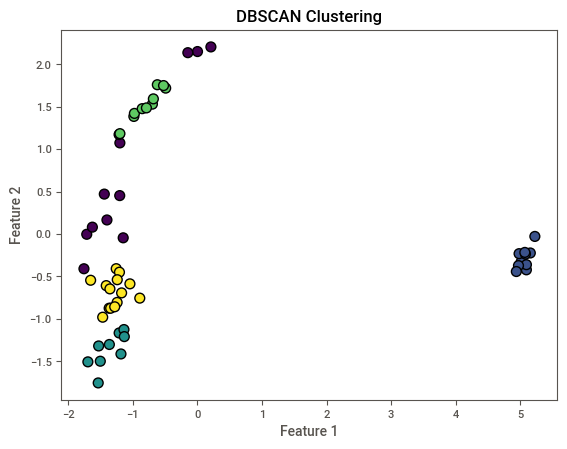

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels2 = dbscan.fit_predict(reduced)

# Plotting the results
plt.scatter(reduced.iloc[:,0], reduced.iloc[:,1], c=labels2, cmap='viridis', s=50, edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Optimal eps: 0.7000000000000001
Optimal min_samples: 5
Optimal Silhouette Score: 0.7973123310639371


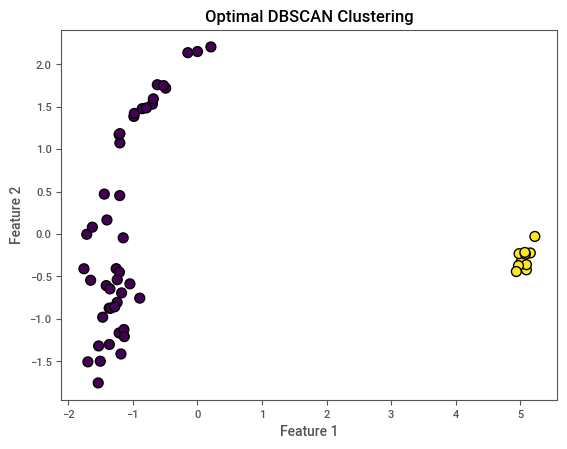

In [ ]:
# Define a range of values for eps and min_samples
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(5, 20)

# Initialize variables to store optimal parameters and corresponding silhouette score
optimal_eps = None
optimal_min_samples = None
max_silhouette_score = -1

# Loop through the parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels2 = dbscan.fit_predict(reduced)

        # Check if DBSCAN found more than one cluster (ignoring noise, labeled as -1)
        if len(set(labels2)) > 1:
            silhouette_avg = silhouette_score(reduced, labels2)

            # Update optimal parameters if silhouette score is higher
            if silhouette_avg > max_silhouette_score:
                max_silhouette_score = silhouette_avg
                optimal_eps = eps
                optimal_min_samples = min_samples

print(f"Optimal eps: {optimal_eps}")
print(f"Optimal min_samples: {optimal_min_samples}")
print(f"Optimal Silhouette Score: {max_silhouette_score}")

# Apply DBSCAN with optimal parameters
optimal_dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_dbscan.fit_predict(reduced)

# Visualize the results
plt.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], c=optimal_labels, cmap='viridis', s=50, edgecolors='k')
plt.title('Optimal DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


- k-means Clustering Silhouette score : 0.74
- Hierarchical Clustering silhouette score : 0.74
- DBSCAN clustering Silhouette score : 0.79
- we are choosing DBSCAN clustering

In [ ]:
optimal_labels

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

####Make new dataframe by adding player's names and their cluster

In [ ]:
names=data['short_name'].to_list()

reduced['cluster']=optimal_labels
reduced['name']=names
reduced.columns=['x','y','cluster','name']
reduced.head()

,x,y,cluster,name
0,-1.693462,-1.505758,0,L. Messi
1,-1.526879,-1.318295,0,Cristiano Ronaldo
2,-1.533649,-1.753984,0,Neymar Jr
3,5.091349,-0.421371,1,J. Oblak
4,-1.501245,-1.498221,0,E. Hazard


##**visualization**

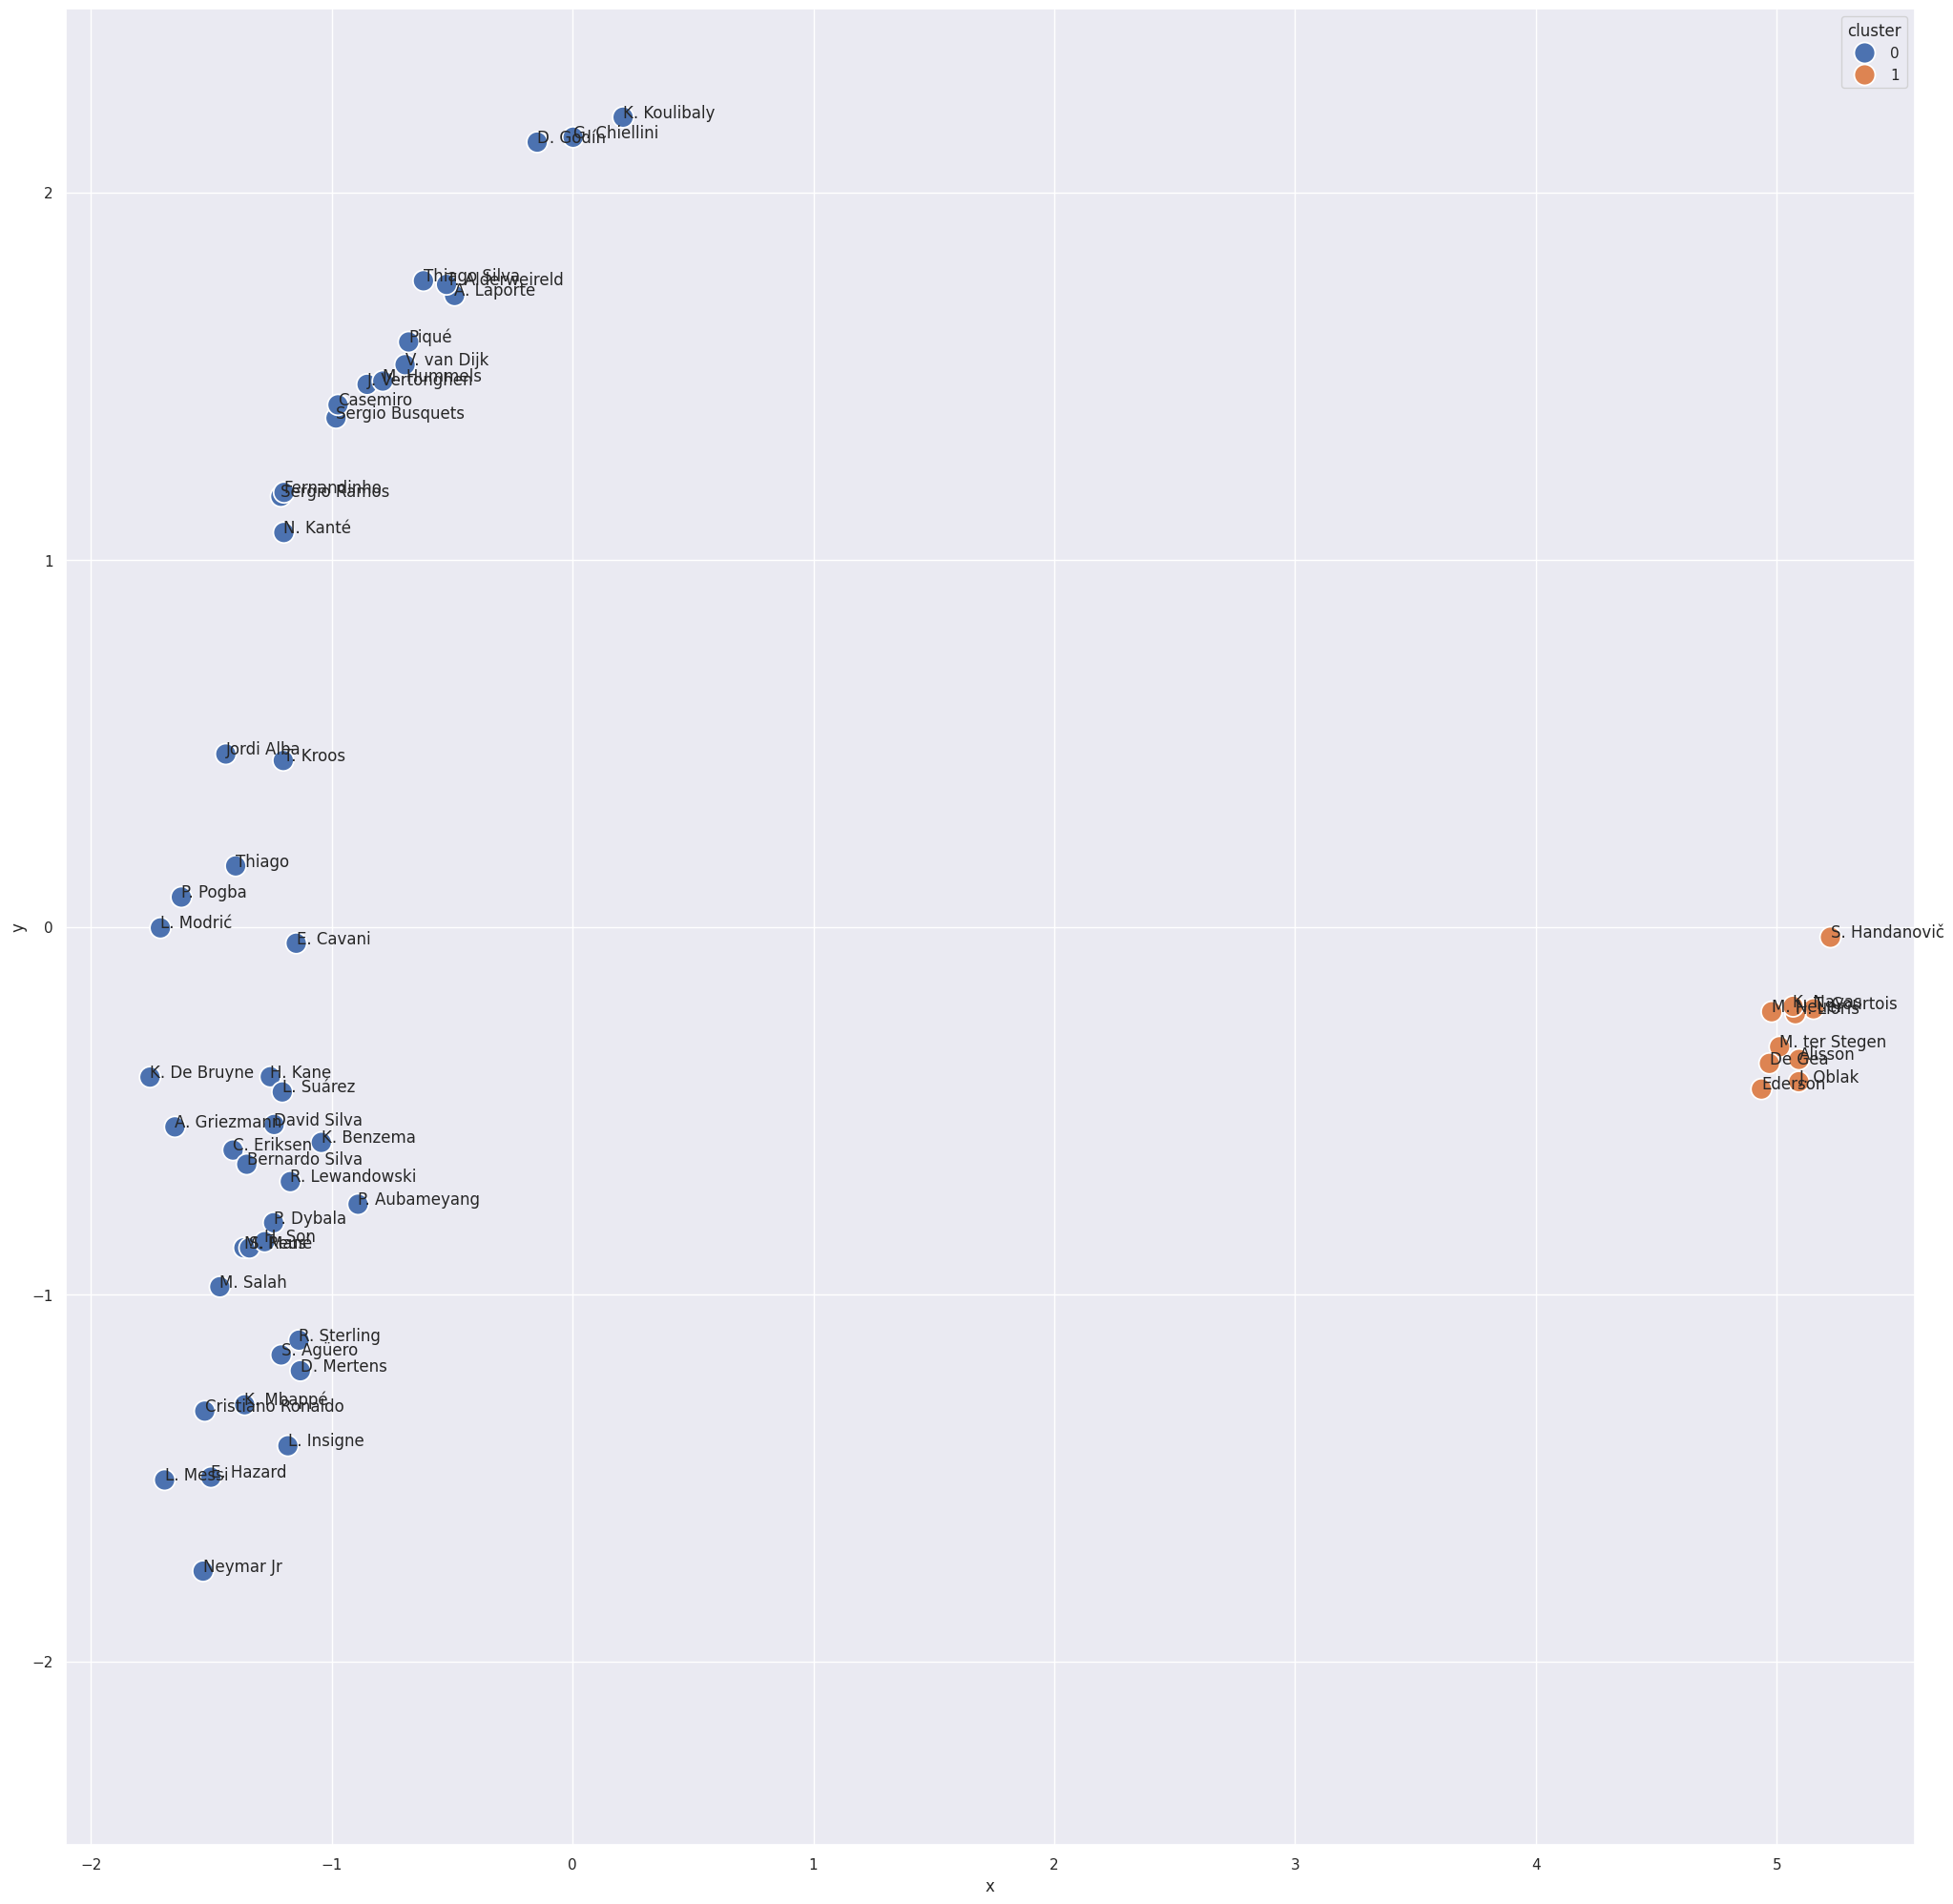

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(25,25))
sns.scatterplot(x='x',y='y', hue= 'cluster',data=reduced, s=250, ax=ax)
texts=[plt.text(x,y,s) for x,y,s in zip(reduced.x,reduced.y,reduced.name)]
ax.set(ylim=(-2.5,2.5))
ax.tick_params()

##**CONCLUSION**

 We have rows - 0 to 18277,Columns - 104 entries,in the fifa20 dataset and we have used KMeans and Hierarchical Clustering and their silhouette score is 0.74 both values are same,and both algorithms are performing well . DBSCAN gives us silhouette score is 0.79 and we are choosing DBSCAN,for DBSCAN we are using 2 clusters[0,1] by doing Visualization we can say that [0-Every Running PLayers],[1-Goalkeepers]    

  The analysis of the dataset provided insights into the soccer players' attributes and their relationship with their age and position, it also identified the top countries producing footballers and the type of offensive players that get paid the most. The analysis can help soccer clubs and managers make informed decisions regarding player recruitment and salary negotiations.

##**RISK**

 1) The dataset contains 3 different features for player's playing positions detailing their usual positions, club position and the nation position. Of these 3 features, player's usual positions(player_positions) alone can be considered as it does not have any null value. The othe 2 features contain a lot of null values.


2) Several features are not required for the model development like player dob, url etc., This dataset required a huge amount of time in performing the domain analysis to identify the features required for the model development


3) There were missing/null values for few key personal skills(pace, shooting etc.,) which required to be pre-processed before the model development


4) Also, for the positional skills[left striker(ls), center back(cb) etc.,] a) all of the values had incremental ranking of type object(ex: 68+2). Those data were pre-processed into numerical values in the data pre-processing section b) few had missing values which required to be pre-processed for the model development


5) Through a detailed domain analysis, repeatable features provided for the goalkeeping skills were identified and removed before the model development


6) There were null/missing values for few key skills like pace, shooting, dribbling etc., and they we handled during the data pre-processing section